<a href="https://colab.research.google.com/github/MurtazaMister/BreakNeck/blob/master/BreakNeck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [3]:
# Function to read the accelerometer file
def read_acc(path):
  df = pd.read_csv(path)
  df[['x-axis (g)', 'y-axis (g)', 'z-axis (g)']] *= 9.81
  return df

# Function to read the gyroscope file
def read_gyro(path):
  df = pd.read_csv(path)
  df[['x-axis (deg/s)', 'y-axis (deg/s)', 'z-axis (deg/s)']] *= (np.pi / 180)
  return df

# Data Collection & Analysis

In [4]:
# Function to plot the signals of accelerometer and gyroscope file
def plot_acc_gyro(df_acc, df_gyro, title):

  if 'elapsed (s)' in df_acc.columns:
    time_acc = df_acc['elapsed (s)']
  else:
    time_acc = pd.Series(range(len(df_acc)))

  if 'elapsed (s)' in df_gyro.columns:
    time_gyro = df_gyro['elapsed (s)']
  else:
    time_gyro = pd.Series(range(len(df_gyro)))

  fig, axs = plt.subplots(1, 2, figsize=(15, 5))

  axs[0].plot(time_acc, df_acc['x-axis (g)'], label='Accel X', color='r')
  axs[0].plot(time_acc, df_acc['y-axis (g)'], label='Accel Y', color='g')
  axs[0].plot(time_acc, df_acc['z-axis (g)'], label='Accel Z', color='b')
  axs[0].set_title('Accelerometer Data')
  axs[0].set_xlabel('Time (s)')
  axs[0].set_ylabel('Acceleration (g)')
  axs[0].legend()
  axs[0].grid(True)

  axs[1].plot(time_gyro, df_gyro['x-axis (deg/s)'], label='Gyro X', color='r')
  axs[1].plot(time_gyro, df_gyro['y-axis (deg/s)'], label='Gyro Y', color='g')
  axs[1].plot(time_gyro, df_gyro['z-axis (deg/s)'], label='Gyro Z', color='b')
  axs[1].set_title('Gyroscope Data')
  axs[1].set_xlabel('Time (s)')
  axs[1].set_ylabel('Angular Velocity (degrees/s)')
  axs[1].legend()
  axs[1].grid(True)

  if title:
    plt.suptitle(title, fontsize=16, fontweight='bold')

  plt.tight_layout()
  plt.show()

## Right Tilt

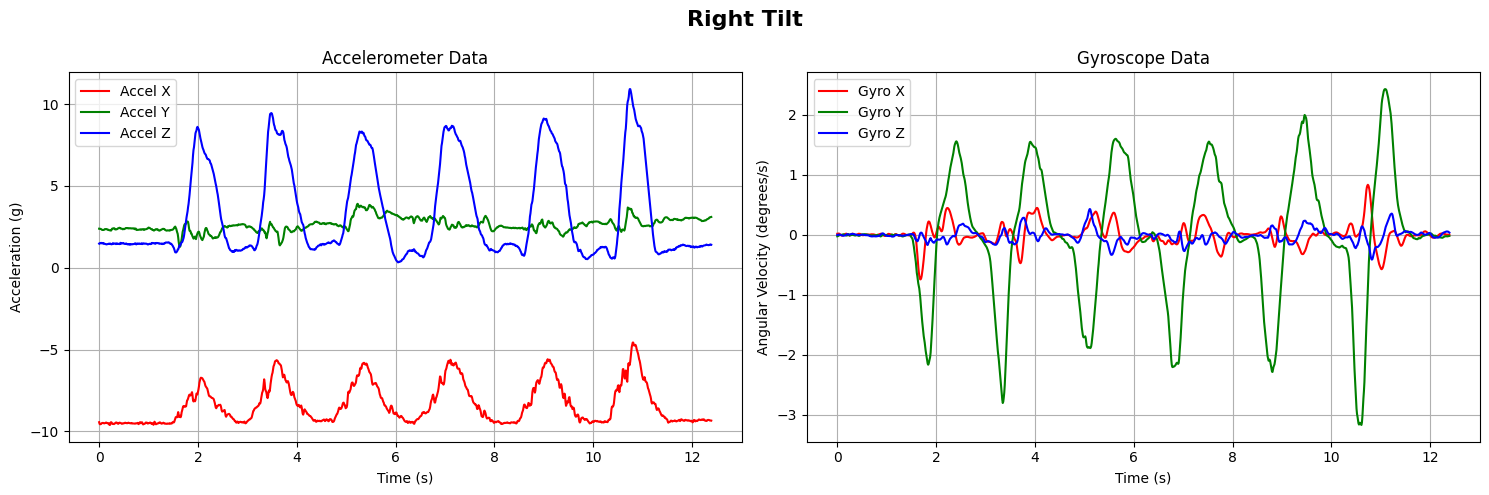

In [5]:
csv_file_acc_path_right_tilt = '/content/drive/My Drive/BreakNeck Data/Right tilt/Accelerometer.csv'
csv_file_gyro_path_right_tilt = '/content/drive/My Drive/BreakNeck Data/Right tilt/Gyroscope.csv'

df_acc_right_tilt = read_acc(csv_file_acc_path_right_tilt)
df_gyro_right_tilt = read_gyro(csv_file_gyro_path_right_tilt)

plot_acc_gyro(df_acc_right_tilt, df_gyro_right_tilt, 'Right Tilt')

## Sleeping Right Tilt

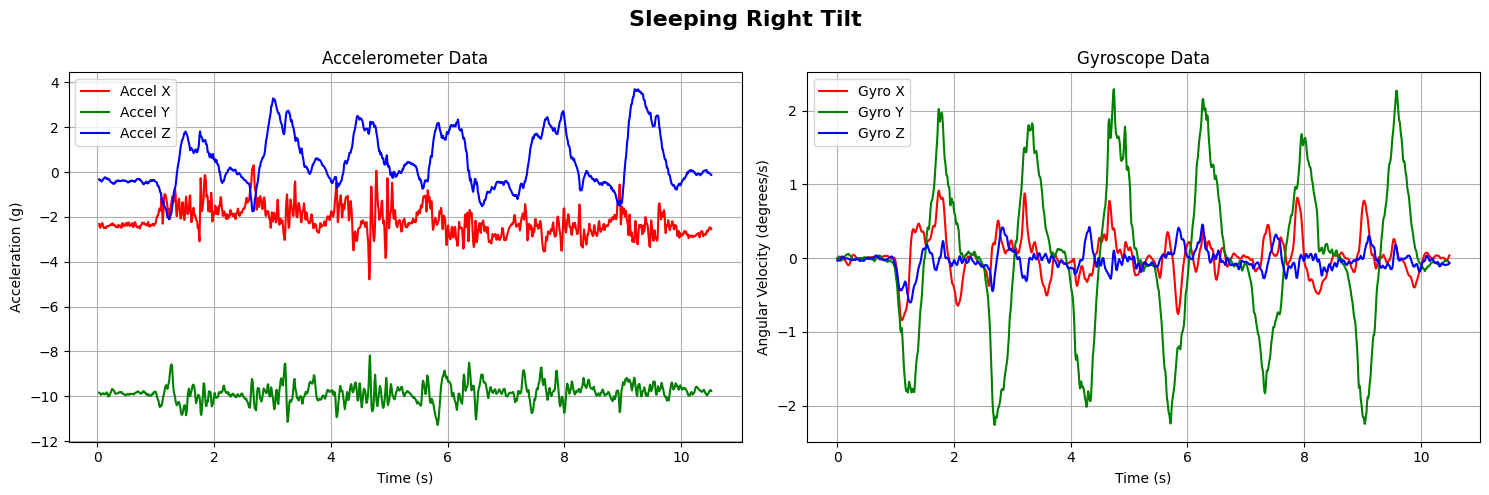

In [6]:
csv_file_acc_path_sleeping_right_tilt = '/content/drive/My Drive/BreakNeck Data/Sleeping Right Tilt/Accelerometer.csv'
csv_file_gyro_path_sleeping_right_tilt = '/content/drive/My Drive/BreakNeck Data/Sleeping Right Tilt/Gyroscope.csv'

df_acc_sleeping_right_tilt = read_acc(csv_file_acc_path_sleeping_right_tilt)
df_gyro_sleeping_right_tilt = read_gyro(csv_file_gyro_path_sleeping_right_tilt)

plot_acc_gyro(df_acc_sleeping_right_tilt, df_gyro_sleeping_right_tilt, 'Sleeping Right Tilt')

## Left Tilt

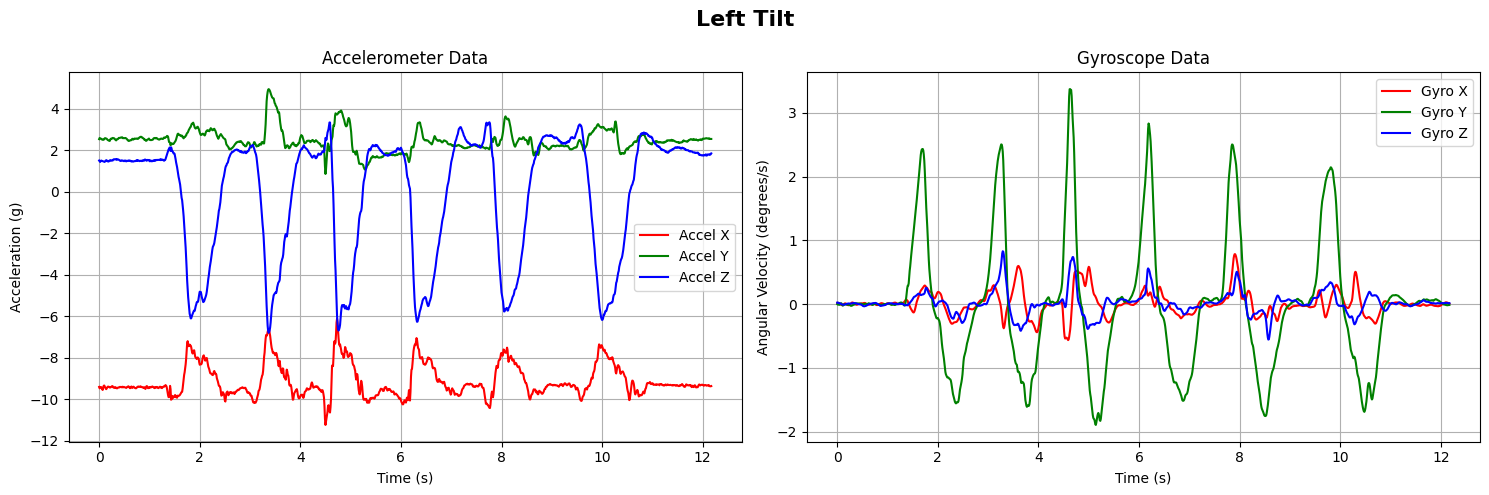

In [7]:
csv_file_acc_path_left_tilt = '/content/drive/My Drive/BreakNeck Data/Left tilt/Accelerometer.csv'
csv_file_gyro_path_left_tilt = '/content/drive/My Drive/BreakNeck Data/Left tilt/Gyroscope.csv'

df_acc_left_tilt = read_acc(csv_file_acc_path_left_tilt)
df_gyro_left_tilt = read_gyro(csv_file_gyro_path_left_tilt)

plot_acc_gyro(df_acc_left_tilt, df_gyro_left_tilt, 'Left Tilt')

## Sleeping Left Tilt

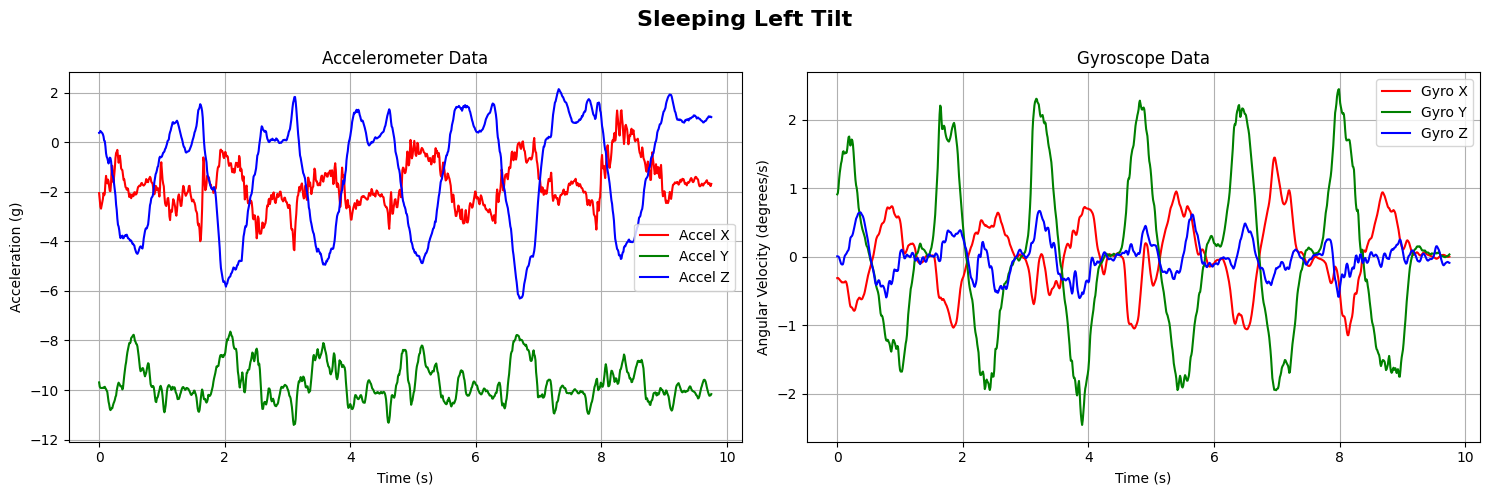

In [8]:
csv_file_acc_path_sleeping_left_tilt = '/content/drive/My Drive/BreakNeck Data/Sleeping Left Tilt/Accelerometer.csv'
csv_file_gyro_path_sleeping_left_tilt = '/content/drive/My Drive/BreakNeck Data/Sleeping Left Tilt/Gyroscope.csv'

df_acc_sleeping_left_tilt = read_acc(csv_file_acc_path_sleeping_left_tilt)
df_gyro_sleeping_left_tilt = read_gyro(csv_file_gyro_path_sleeping_left_tilt)

plot_acc_gyro(df_acc_sleeping_left_tilt, df_gyro_sleeping_left_tilt, 'Sleeping Left Tilt')

## Front nod

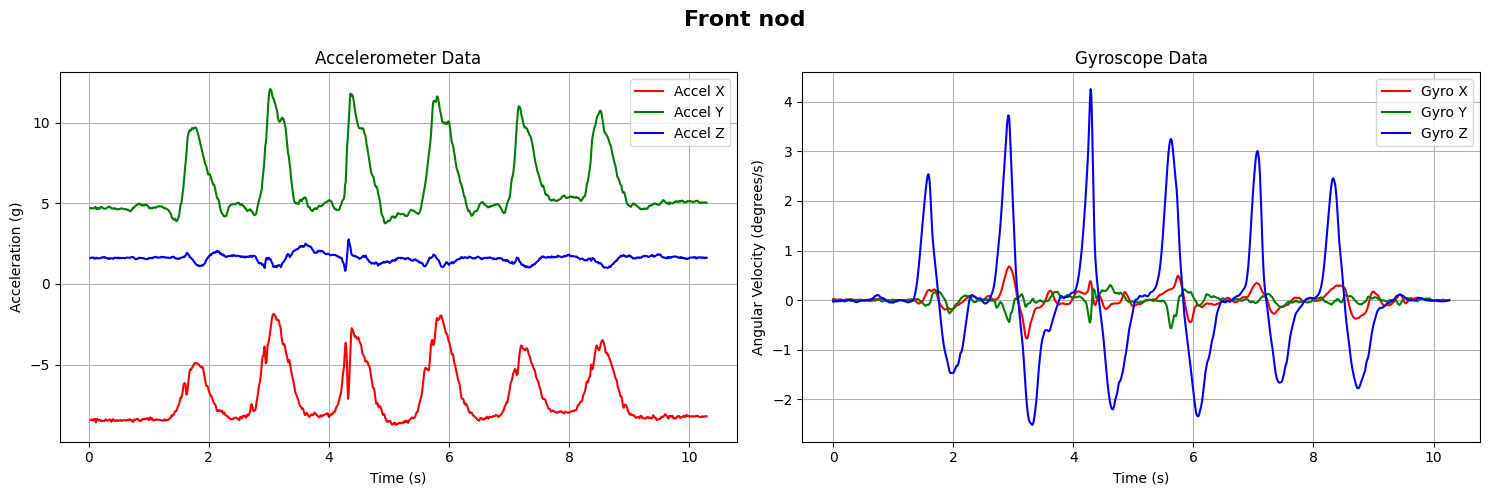

In [9]:
csv_file_acc_path_front_nod = '/content/drive/My Drive/BreakNeck Data/Front nod/Accelerometer.csv'
csv_file_gyro_path_front_nod = '/content/drive/My Drive/BreakNeck Data/Front nod/Gyroscope.csv'

df_acc_front_nod = read_acc(csv_file_acc_path_front_nod)
df_gyro_front_nod = read_gyro(csv_file_gyro_path_front_nod)

plot_acc_gyro(df_acc_front_nod, df_gyro_front_nod, 'Front nod')

## Back nod

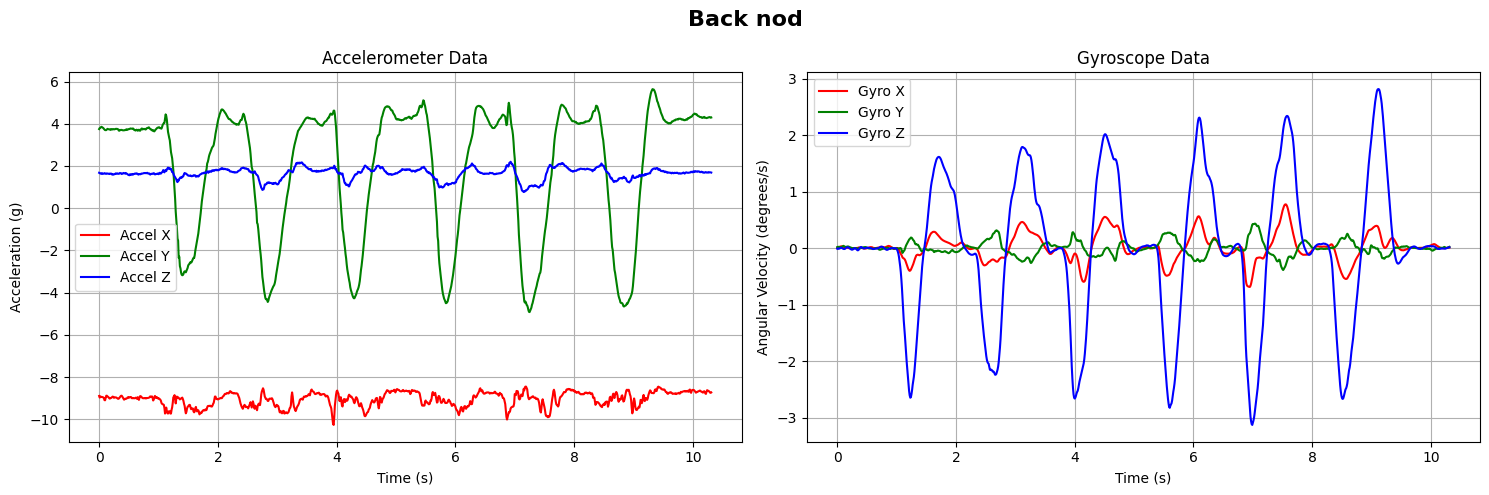

In [10]:
csv_file_acc_path_back_nod = '/content/drive/My Drive/BreakNeck Data/Back nod/Accelerometer.csv'
csv_file_gyro_path_back_nod = '/content/drive/My Drive/BreakNeck Data/Back nod/Gyroscope.csv'

df_acc_back_nod = read_acc(csv_file_acc_path_back_nod)
df_gyro_back_nod = read_gyro(csv_file_gyro_path_back_nod)

plot_acc_gyro(df_acc_back_nod, df_gyro_back_nod, 'Back nod')

# Low pass filter

In [11]:
# Function for low-pass filter
def butter_lowpass_filter(data, cutoff=5, fs=100, order=15):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

## Filtering Right Tilt data

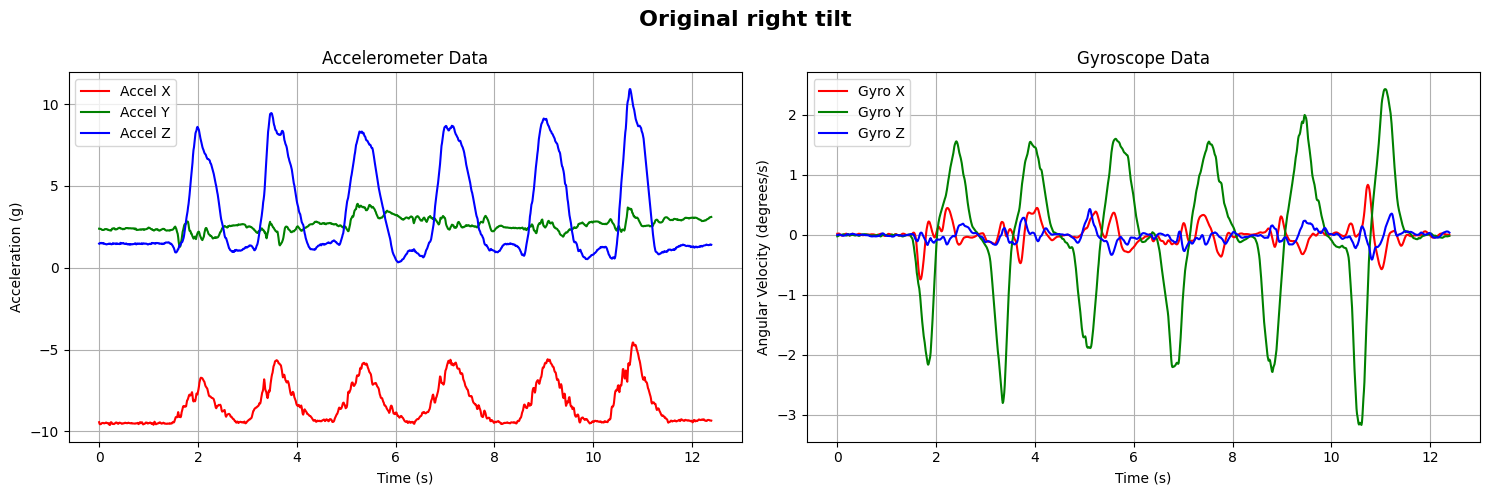

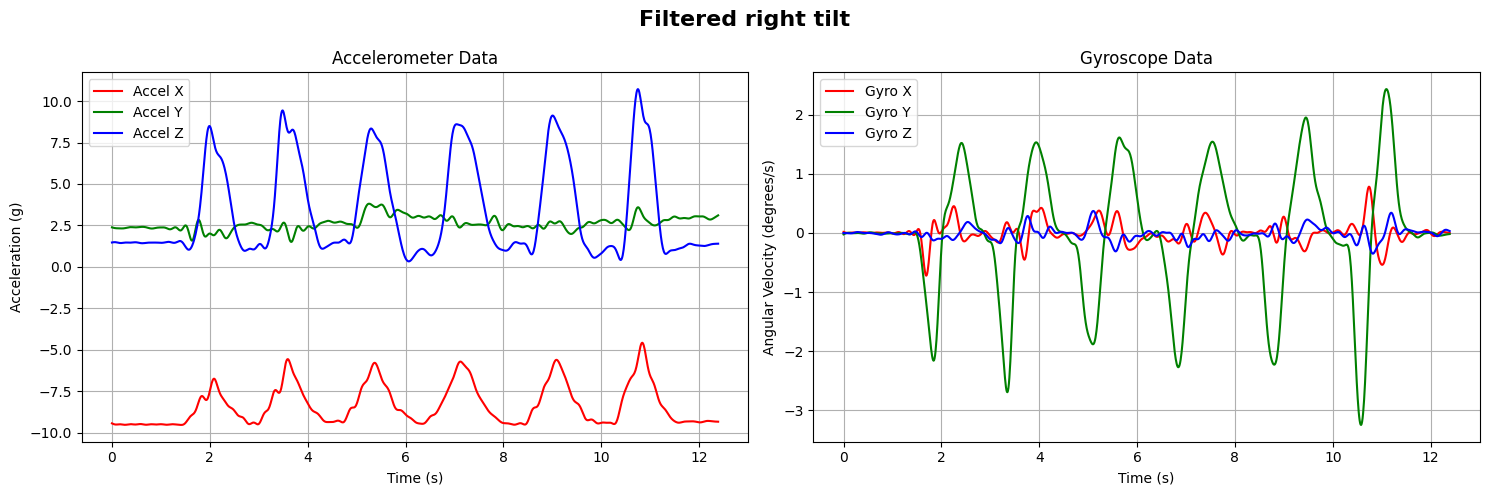

In [12]:
df_acc_right_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_acc_right_tilt['elapsed (s)'],
    'x-axis (g)': butter_lowpass_filter(df_acc_right_tilt['x-axis (g)']),
    'y-axis (g)': butter_lowpass_filter(df_acc_right_tilt['y-axis (g)']),
    'z-axis (g)': butter_lowpass_filter(df_acc_right_tilt['z-axis (g)'])
})

df_gyro_right_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_gyro_right_tilt['elapsed (s)'],
    'x-axis (deg/s)': butter_lowpass_filter(df_gyro_right_tilt['x-axis (deg/s)']),
    'y-axis (deg/s)': butter_lowpass_filter(df_gyro_right_tilt['y-axis (deg/s)']),
    'z-axis (deg/s)': butter_lowpass_filter(df_gyro_right_tilt['z-axis (deg/s)'])
})

plot_acc_gyro(df_acc_right_tilt, df_gyro_right_tilt, 'Original right tilt')
plot_acc_gyro(df_acc_right_tilt_filtered, df_gyro_right_tilt_filtered, 'Filtered right tilt')

## Filtering Left Tilt data

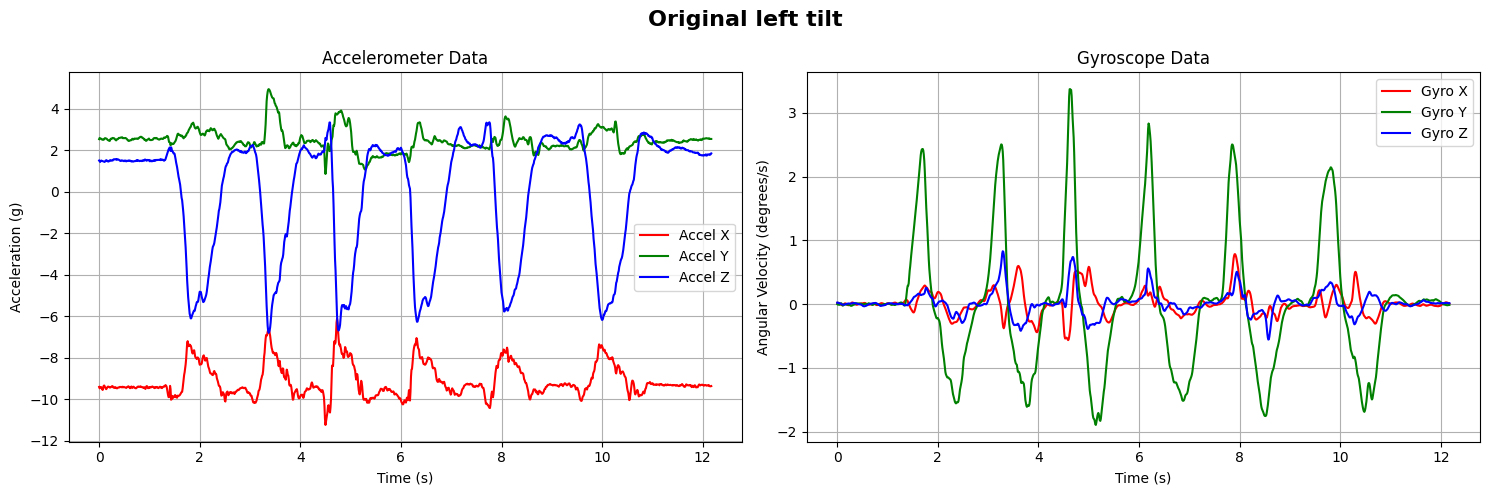

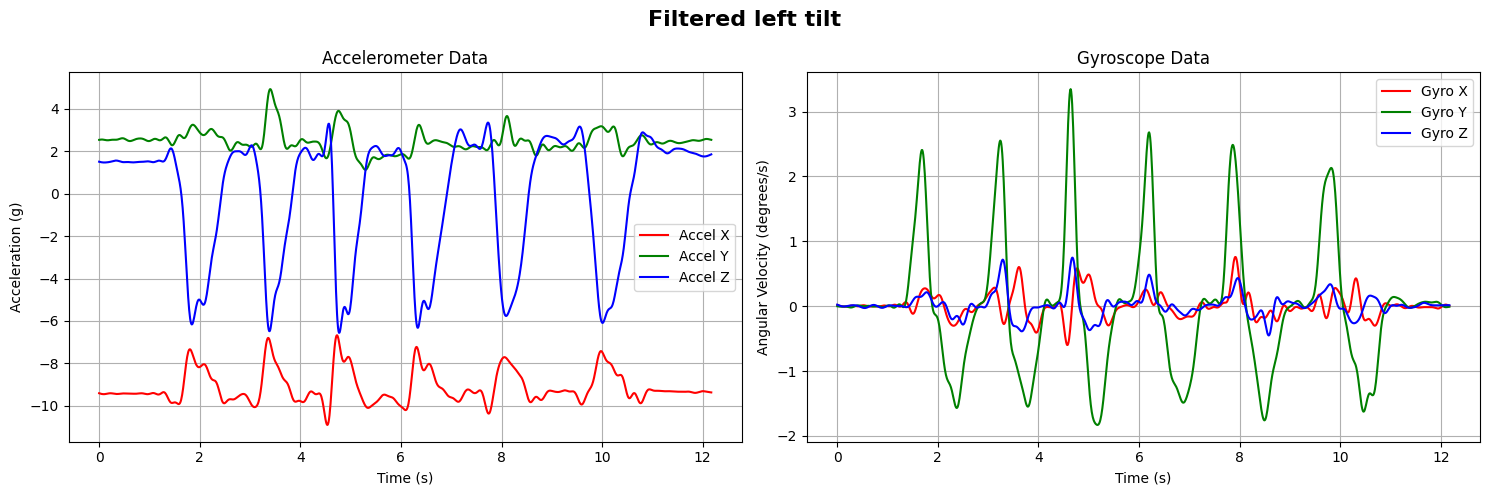

In [13]:
df_acc_left_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_acc_left_tilt['elapsed (s)'],
    'x-axis (g)': butter_lowpass_filter(df_acc_left_tilt['x-axis (g)']),
    'y-axis (g)': butter_lowpass_filter(df_acc_left_tilt['y-axis (g)']),
    'z-axis (g)': butter_lowpass_filter(df_acc_left_tilt['z-axis (g)'])
})

df_gyro_left_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_gyro_left_tilt['elapsed (s)'],
    'x-axis (deg/s)': butter_lowpass_filter(df_gyro_left_tilt['x-axis (deg/s)']),
    'y-axis (deg/s)': butter_lowpass_filter(df_gyro_left_tilt['y-axis (deg/s)']),
    'z-axis (deg/s)': butter_lowpass_filter(df_gyro_left_tilt['z-axis (deg/s)'])
})

plot_acc_gyro(df_acc_left_tilt, df_gyro_left_tilt, 'Original left tilt')
plot_acc_gyro(df_acc_left_tilt_filtered, df_gyro_left_tilt_filtered, 'Filtered left tilt')

## Filtering Front nod data

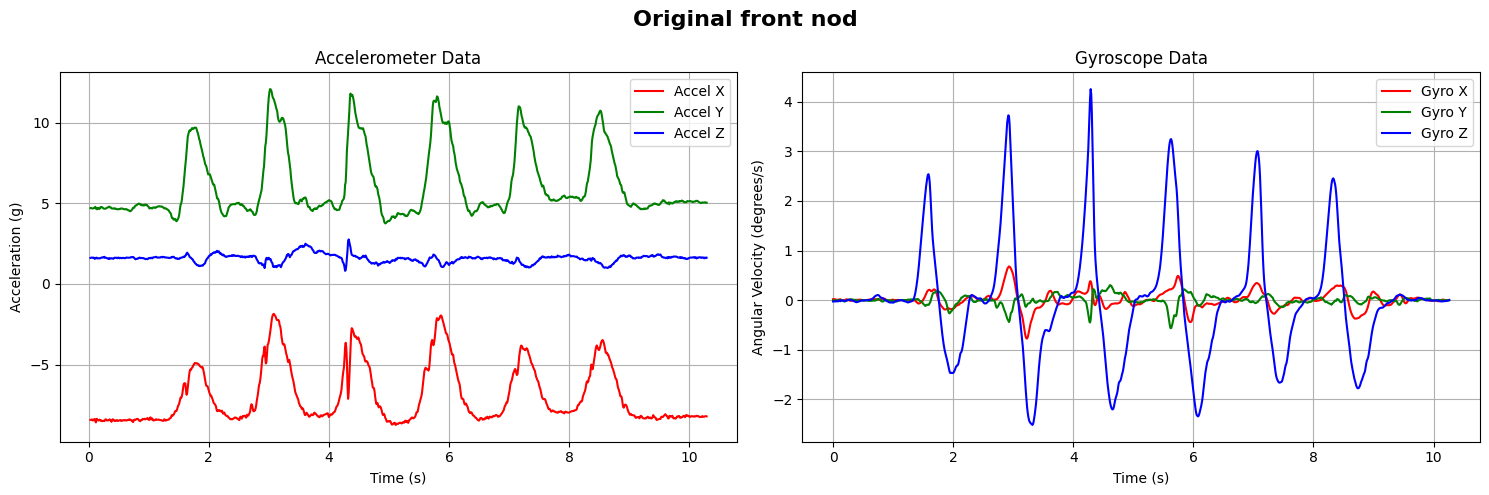

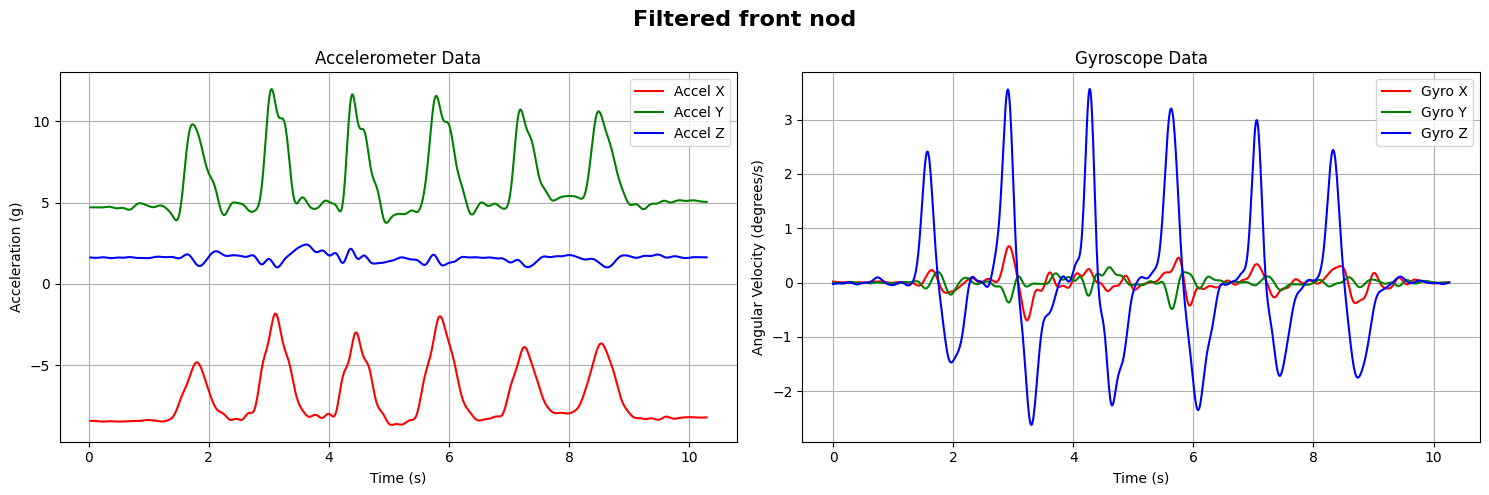

In [14]:
df_acc_front_nod_filtered = pd.DataFrame({
    'elapsed (s)': df_acc_front_nod['elapsed (s)'],
    'x-axis (g)': butter_lowpass_filter(df_acc_front_nod['x-axis (g)']),
    'y-axis (g)': butter_lowpass_filter(df_acc_front_nod['y-axis (g)']),
    'z-axis (g)': butter_lowpass_filter(df_acc_front_nod['z-axis (g)'])
})

df_gyro_front_nod_filtered = pd.DataFrame({
    'elapsed (s)': df_gyro_front_nod['elapsed (s)'],
    'x-axis (deg/s)': butter_lowpass_filter(df_gyro_front_nod['x-axis (deg/s)']),
    'y-axis (deg/s)': butter_lowpass_filter(df_gyro_front_nod['y-axis (deg/s)']),
    'z-axis (deg/s)': butter_lowpass_filter(df_gyro_front_nod['z-axis (deg/s)'])
})

plot_acc_gyro(df_acc_front_nod, df_gyro_front_nod, 'Original front nod')
plot_acc_gyro(df_acc_front_nod_filtered, df_gyro_front_nod_filtered, 'Filtered front nod')

## Filtering Back nod data

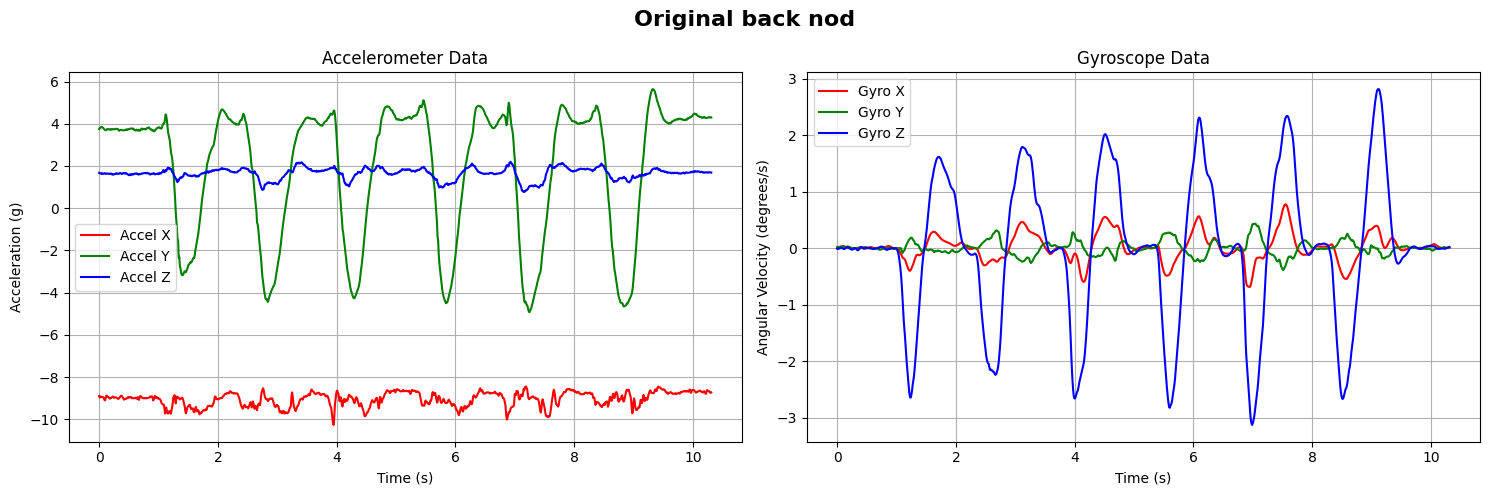

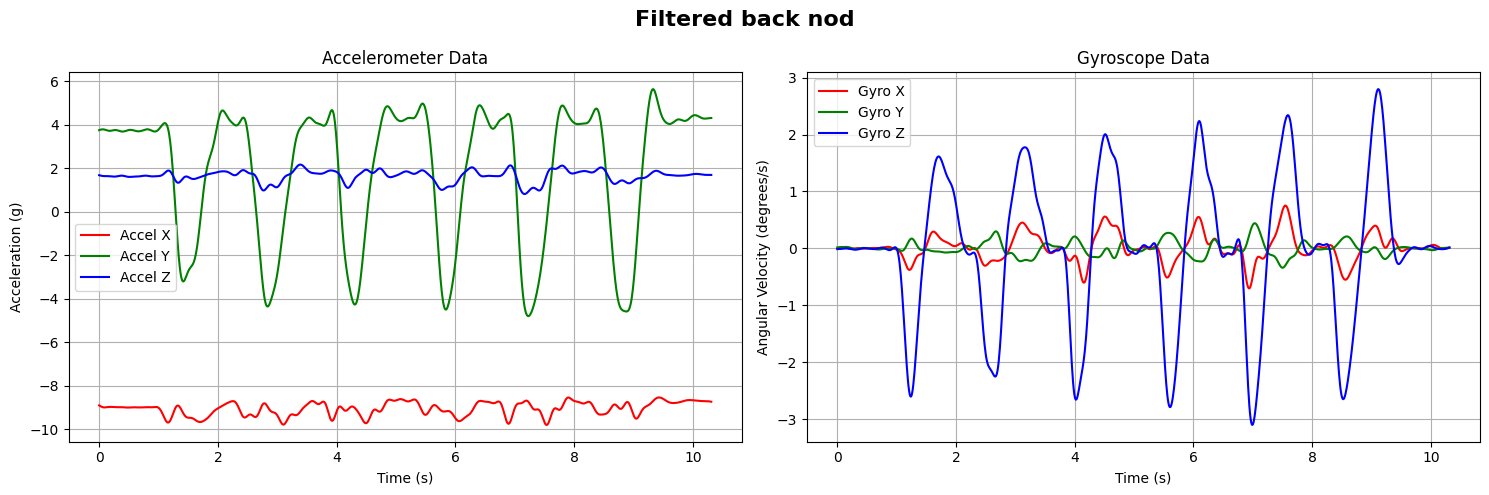

In [15]:
df_acc_back_nod_filtered = pd.DataFrame({
    'elapsed (s)': df_acc_back_nod['elapsed (s)'],
    'x-axis (g)': butter_lowpass_filter(df_acc_back_nod['x-axis (g)']),
    'y-axis (g)': butter_lowpass_filter(df_acc_back_nod['y-axis (g)']),
    'z-axis (g)': butter_lowpass_filter(df_acc_back_nod['z-axis (g)'])
})

df_gyro_back_nod_filtered = pd.DataFrame({
    'elapsed (s)': df_gyro_back_nod['elapsed (s)'],
    'x-axis (deg/s)': butter_lowpass_filter(df_gyro_back_nod['x-axis (deg/s)']),
    'y-axis (deg/s)': butter_lowpass_filter(df_gyro_back_nod['y-axis (deg/s)']),
    'z-axis (deg/s)': butter_lowpass_filter(df_gyro_back_nod['z-axis (deg/s)'])
})

plot_acc_gyro(df_acc_back_nod, df_gyro_back_nod, 'Original back nod')
plot_acc_gyro(df_acc_back_nod_filtered, df_gyro_back_nod_filtered, 'Filtered back nod')

## Filtering Sleeping Left Tilt data

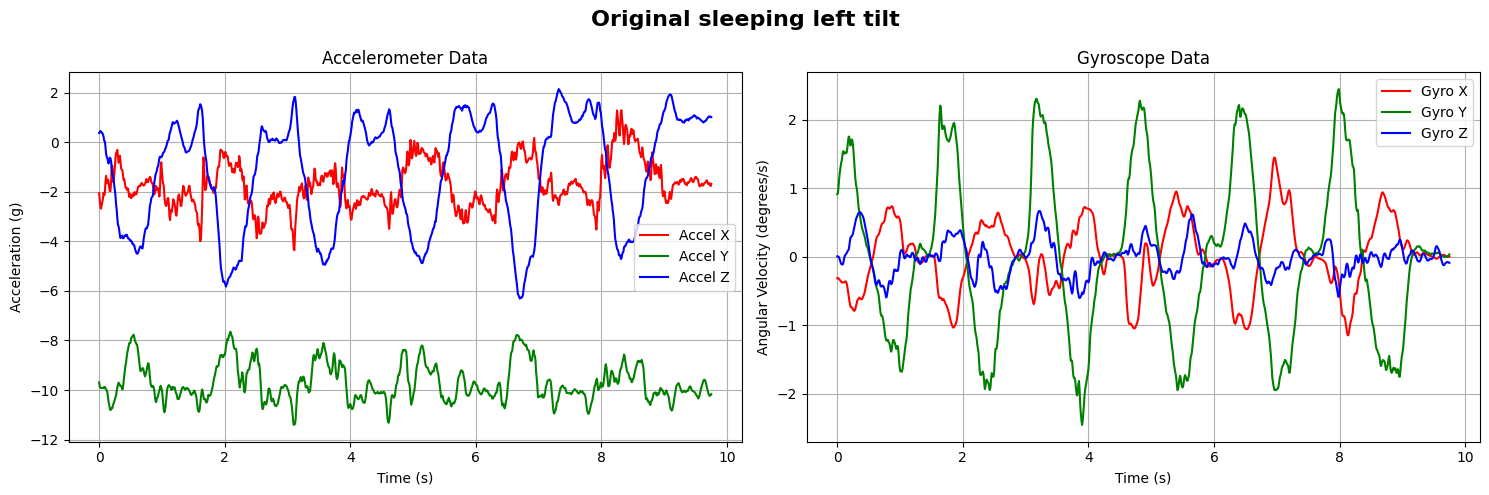

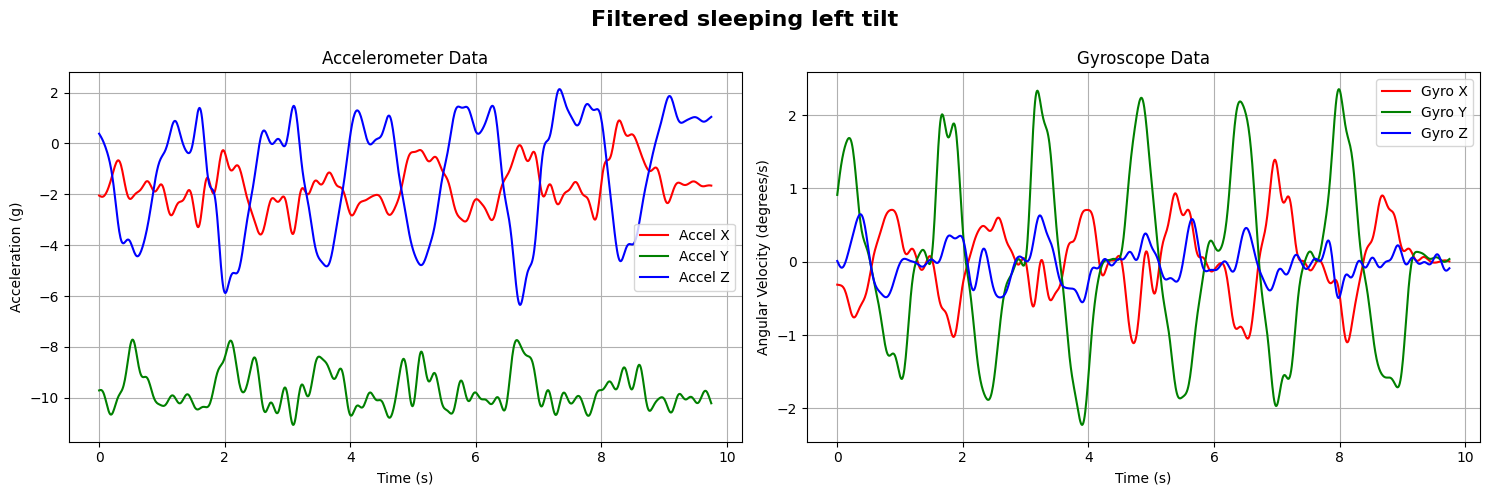

In [16]:
df_acc_sleeping_left_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_acc_sleeping_left_tilt['elapsed (s)'],
    'x-axis (g)': butter_lowpass_filter(df_acc_sleeping_left_tilt['x-axis (g)']),
    'y-axis (g)': butter_lowpass_filter(df_acc_sleeping_left_tilt['y-axis (g)']),
    'z-axis (g)': butter_lowpass_filter(df_acc_sleeping_left_tilt['z-axis (g)'])
})

df_gyro_sleeping_left_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_gyro_sleeping_left_tilt['elapsed (s)'],
    'x-axis (deg/s)': butter_lowpass_filter(df_gyro_sleeping_left_tilt['x-axis (deg/s)']),
    'y-axis (deg/s)': butter_lowpass_filter(df_gyro_sleeping_left_tilt['y-axis (deg/s)']),
    'z-axis (deg/s)': butter_lowpass_filter(df_gyro_sleeping_left_tilt['z-axis (deg/s)'])
})

plot_acc_gyro(df_acc_sleeping_left_tilt, df_gyro_sleeping_left_tilt, 'Original sleeping left tilt')
plot_acc_gyro(df_acc_sleeping_left_tilt_filtered, df_gyro_sleeping_left_tilt_filtered, 'Filtered sleeping left tilt')

## Filtering Sleeping right tilt data

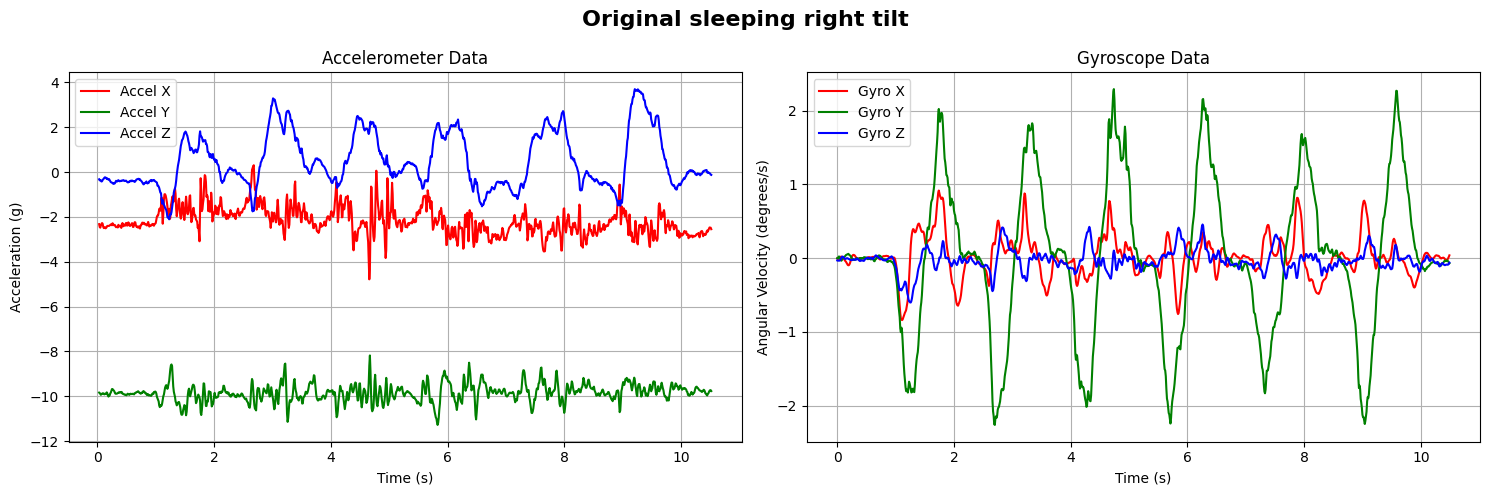

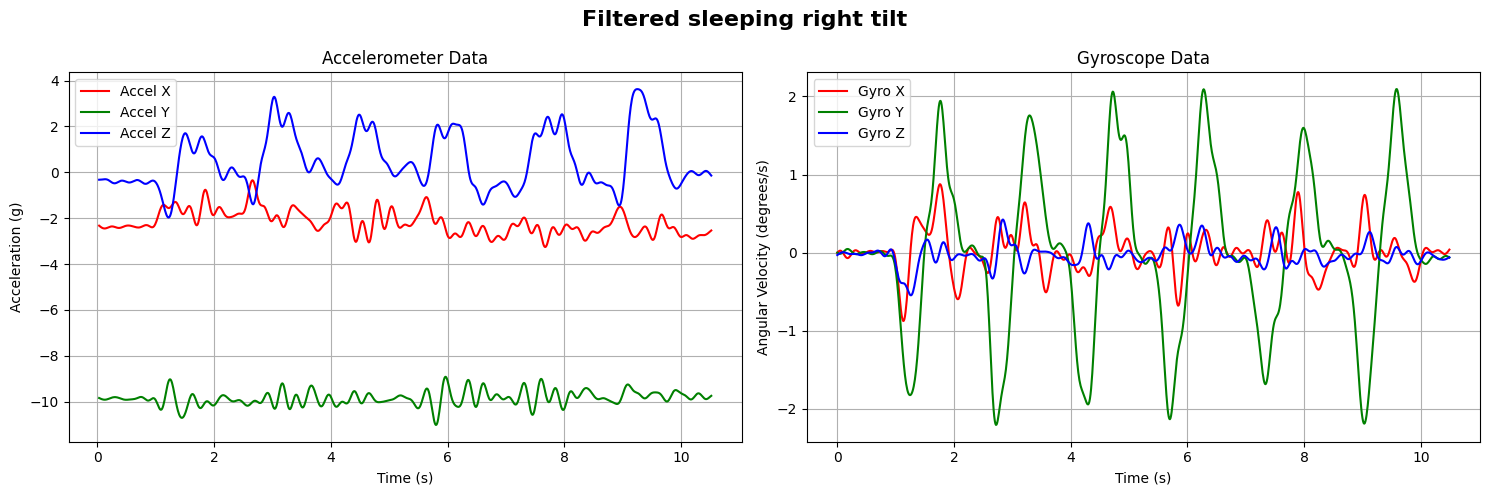

In [17]:
df_acc_sleeping_right_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_acc_sleeping_right_tilt['elapsed (s)'],
    'x-axis (g)': butter_lowpass_filter(df_acc_sleeping_right_tilt['x-axis (g)']),
    'y-axis (g)': butter_lowpass_filter(df_acc_sleeping_right_tilt['y-axis (g)']),
    'z-axis (g)': butter_lowpass_filter(df_acc_sleeping_right_tilt['z-axis (g)'])
})

df_gyro_sleeping_right_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_gyro_sleeping_right_tilt['elapsed (s)'],
    'x-axis (deg/s)': butter_lowpass_filter(df_gyro_sleeping_right_tilt['x-axis (deg/s)']),
    'y-axis (deg/s)': butter_lowpass_filter(df_gyro_sleeping_right_tilt['y-axis (deg/s)']),
    'z-axis (deg/s)': butter_lowpass_filter(df_gyro_sleeping_right_tilt['z-axis (deg/s)'])
})

plot_acc_gyro(df_acc_sleeping_right_tilt, df_gyro_sleeping_right_tilt, 'Original sleeping right tilt')
plot_acc_gyro(df_acc_sleeping_right_tilt_filtered, df_gyro_sleeping_right_tilt_filtered, 'Filtered sleeping right tilt')

# Template construction for matching incoming samples

In [18]:
from enum import Enum

class Match(Enum):
    RIGHT_TILT = 1
    LEFT_TILT = 2
    FRONT_NOD = 3
    BACK_NOD = 4

def strToMatch(str):
  ans = []
  for char in str:
    if char == 'R':
      ans.append(Match.RIGHT_TILT)
    elif char == 'L':
      ans.append(Match.LEFT_TILT)
    elif char == 'U':
      ans.append(Match.FRONT_NOD)
    elif char == 'D':
      ans.append(Match.BACK_NOD)
  return ans

## Right tilt template construction

149
149


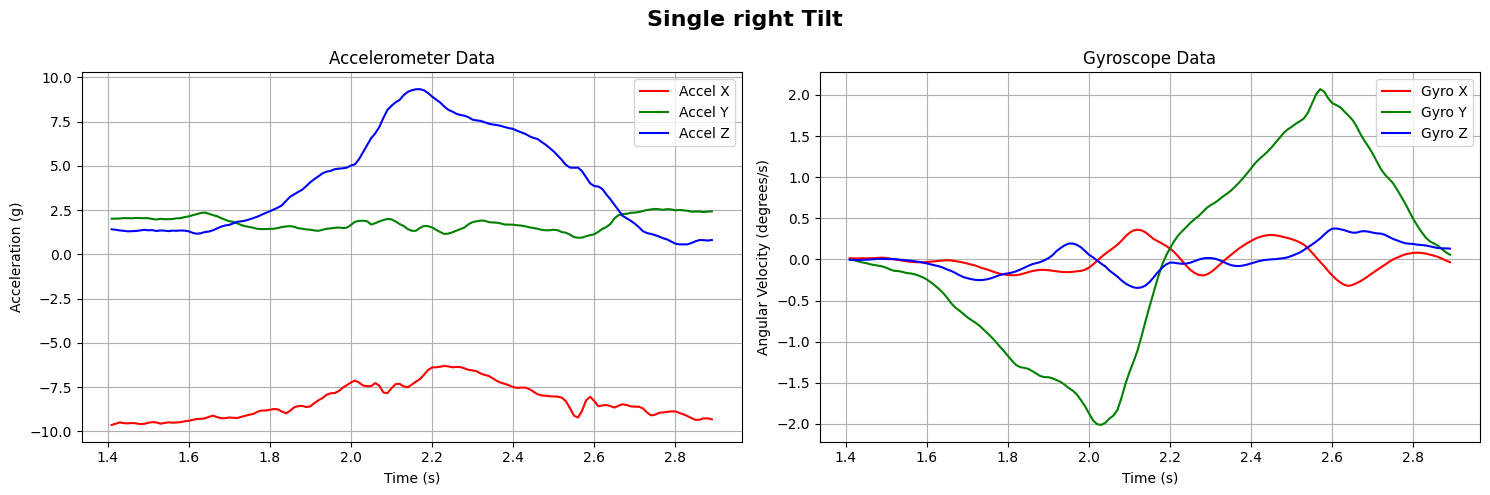

In [19]:
csv_file_acc_path_single_right_tilt = '/content/drive/My Drive/BreakNeck Data/Single right tilt/Accelerometer.csv'
csv_file_gyro_path_single_right_tilt = '/content/drive/My Drive/BreakNeck Data/Single right tilt/Gyroscope.csv'

df_acc_single_right_tilt = read_acc(csv_file_acc_path_single_right_tilt)
df_gyro_single_right_tilt = read_gyro(csv_file_gyro_path_single_right_tilt)

df_acc_single_right_tilt = df_acc_single_right_tilt[(df_acc_single_right_tilt['elapsed (s)'] > 1.4) &
                                          (df_acc_single_right_tilt['elapsed (s)'] < 2.9)]
df_gyro_single_right_tilt = df_gyro_single_right_tilt[(df_gyro_single_right_tilt['elapsed (s)'] > 1.4) &
                                            (df_gyro_single_right_tilt['elapsed (s)'] < 2.9)]

print(len(df_acc_single_right_tilt))
print(len(df_gyro_single_right_tilt))

plot_acc_gyro(df_acc_single_right_tilt, df_gyro_single_right_tilt, 'Single right Tilt')

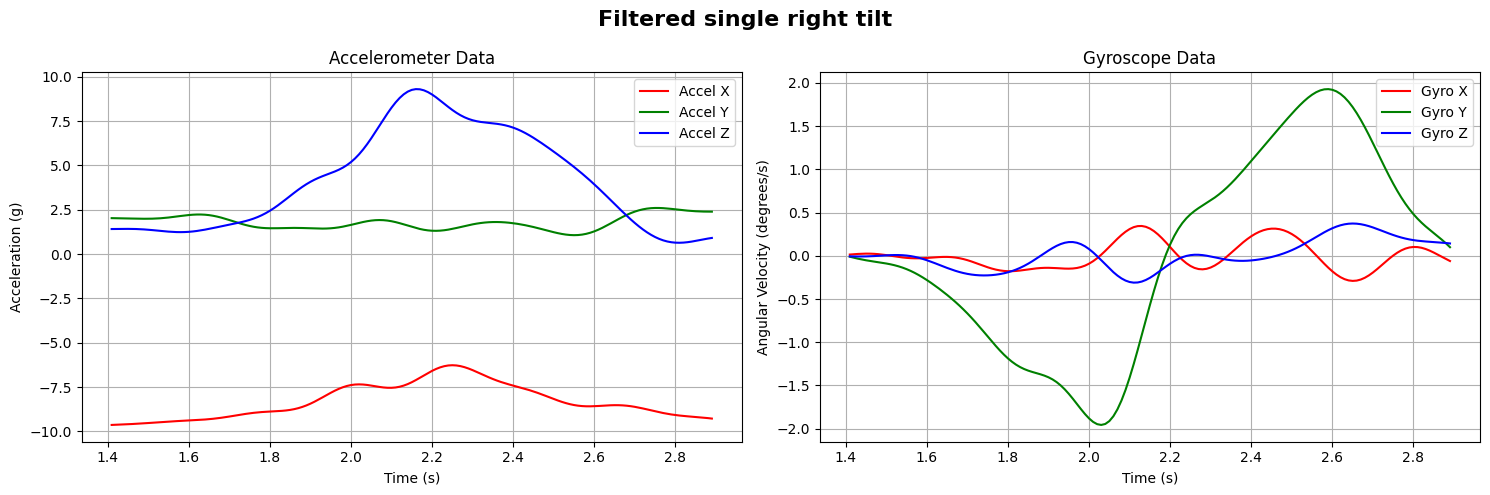

In [20]:
df_acc_single_right_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_acc_single_right_tilt['elapsed (s)'],
    'x-axis (g)': butter_lowpass_filter(df_acc_single_right_tilt['x-axis (g)']),
    'y-axis (g)': butter_lowpass_filter(df_acc_single_right_tilt['y-axis (g)']),
    'z-axis (g)': butter_lowpass_filter(df_acc_single_right_tilt['z-axis (g)'])
})

df_gyro_single_right_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_gyro_single_right_tilt['elapsed (s)'],
    'x-axis (deg/s)': butter_lowpass_filter(df_gyro_single_right_tilt['x-axis (deg/s)']),
    'y-axis (deg/s)': butter_lowpass_filter(df_gyro_single_right_tilt['y-axis (deg/s)']),
    'z-axis (deg/s)': butter_lowpass_filter(df_gyro_single_right_tilt['z-axis (deg/s)'])
})

plot_acc_gyro(df_acc_single_right_tilt_filtered, df_gyro_single_right_tilt_filtered, 'Filtered single right tilt')

In [21]:
template_right_tilt = {
    'data':pd.DataFrame({
    'elapsed (s)': df_acc_single_right_tilt_filtered['elapsed (s)'],
    'acc': df_acc_single_right_tilt_filtered['z-axis (g)'],
    'gyro': df_gyro_single_right_tilt_filtered['y-axis (deg/s)'],
    }),
    'type': Match.RIGHT_TILT
}
template_right_tilt

{'data':      elapsed (s)       acc      gyro
 141         1.41  1.411033 -0.010246
 142         1.42  1.413590 -0.021940
 143         1.43  1.416532 -0.032771
 144         1.44  1.418789 -0.042611
 145         1.45  1.419307 -0.051452
 ..           ...       ...       ...
 285         2.85  0.742067  0.262877
 286         2.86  0.786136  0.225038
 287         2.87  0.830647  0.186015
 288         2.88  0.872406  0.144590
 289         2.89  0.908515  0.099754
 
 [149 rows x 3 columns],
 'type': <Match.RIGHT_TILT: 1>}

## Left tilt template construction

149
149


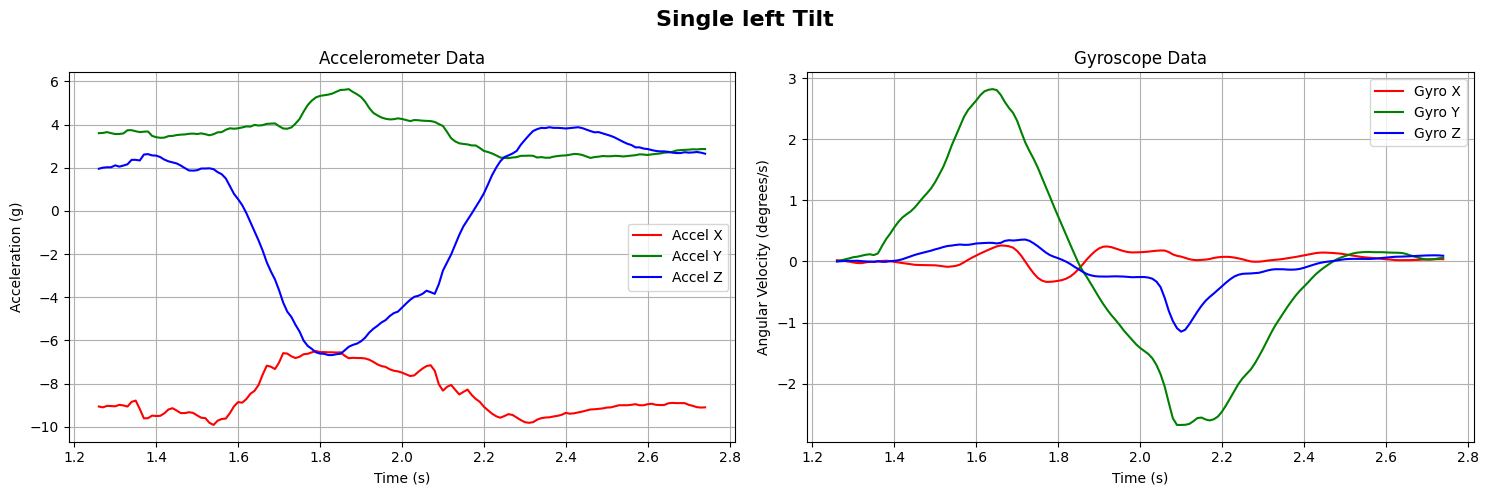

In [22]:
csv_file_acc_path_single_left_tilt = '/content/drive/My Drive/BreakNeck Data/Single left tilt/Accelerometer.csv'
csv_file_gyro_path_single_left_tilt = '/content/drive/My Drive/BreakNeck Data/Single left tilt/Gyroscope.csv'

df_acc_single_left_tilt = read_acc(csv_file_acc_path_single_left_tilt)
df_gyro_single_left_tilt = read_gyro(csv_file_gyro_path_single_left_tilt)

df_acc_single_left_tilt = df_acc_single_left_tilt[(df_acc_single_left_tilt['elapsed (s)'] > 1.25) &
                                          (df_acc_single_left_tilt['elapsed (s)'] < 2.75)]
df_gyro_single_left_tilt = df_gyro_single_left_tilt[(df_gyro_single_left_tilt['elapsed (s)'] > 1.25) &
                                            (df_gyro_single_left_tilt['elapsed (s)'] < 2.75)]

print(len(df_acc_single_left_tilt))
print(len(df_gyro_single_left_tilt))

plot_acc_gyro(df_acc_single_left_tilt, df_gyro_single_left_tilt, 'Single left Tilt')

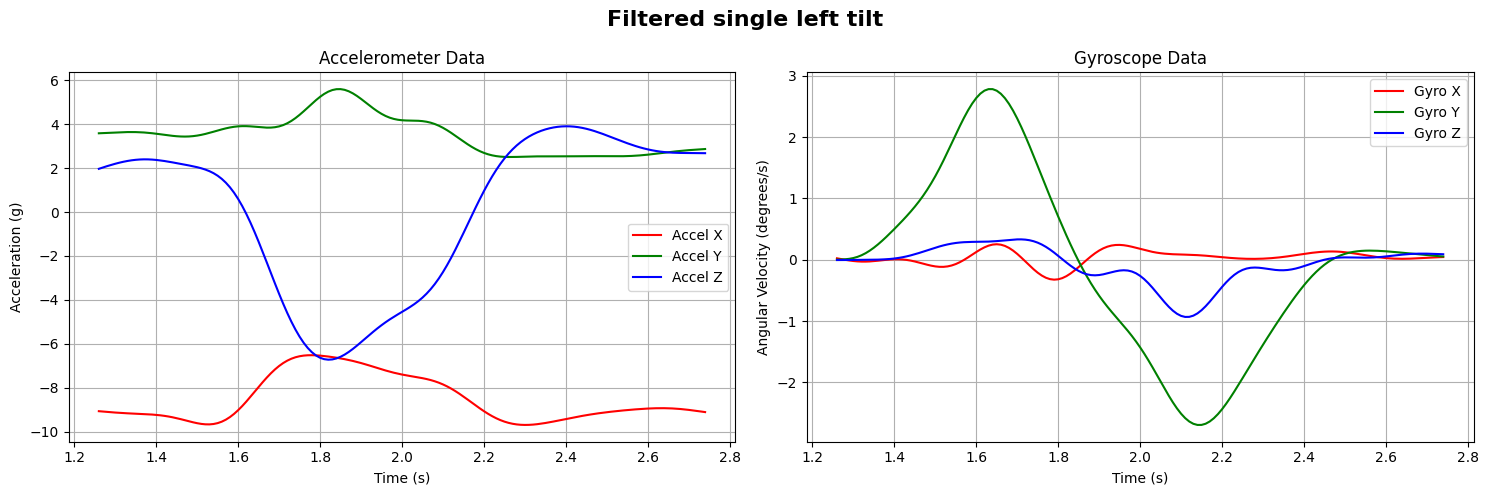

In [23]:
df_acc_single_left_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_acc_single_left_tilt['elapsed (s)'],
    'x-axis (g)': butter_lowpass_filter(df_acc_single_left_tilt['x-axis (g)']),
    'y-axis (g)': butter_lowpass_filter(df_acc_single_left_tilt['y-axis (g)']),
    'z-axis (g)': butter_lowpass_filter(df_acc_single_left_tilt['z-axis (g)'])
})

df_gyro_single_left_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_gyro_single_left_tilt['elapsed (s)'],
    'x-axis (deg/s)': butter_lowpass_filter(df_gyro_single_left_tilt['x-axis (deg/s)']),
    'y-axis (deg/s)': butter_lowpass_filter(df_gyro_single_left_tilt['y-axis (deg/s)']),
    'z-axis (deg/s)': butter_lowpass_filter(df_gyro_single_left_tilt['z-axis (deg/s)'])
})

plot_acc_gyro(df_acc_single_left_tilt_filtered, df_gyro_single_left_tilt_filtered, 'Filtered single left tilt')

In [24]:
template_left_tilt = {
    'data': pd.DataFrame({
    'elapsed (s)': df_acc_single_left_tilt_filtered['elapsed (s)'],
    'acc': df_acc_single_left_tilt_filtered['z-axis (g)'],
    'gyro': df_gyro_single_left_tilt_filtered['y-axis (deg/s)'],
      }),
    'type': Match.LEFT_TILT
}
template_left_tilt

{'data':      elapsed (s)       acc      gyro
 126         1.26  1.967259  0.003278
 127         1.27  2.029058  0.004886
 128         1.28  2.088658  0.008427
 129         1.29  2.145232  0.015757
 130         1.30  2.197986  0.028441
 ..           ...       ...       ...
 270         2.70  2.687374  0.076279
 271         2.71  2.686894  0.070283
 272         2.72  2.685937  0.064512
 273         2.73  2.683655  0.058970
 274         2.74  2.679312  0.053649
 
 [149 rows x 3 columns],
 'type': <Match.LEFT_TILT: 2>}

## Front nod template construction

149
149


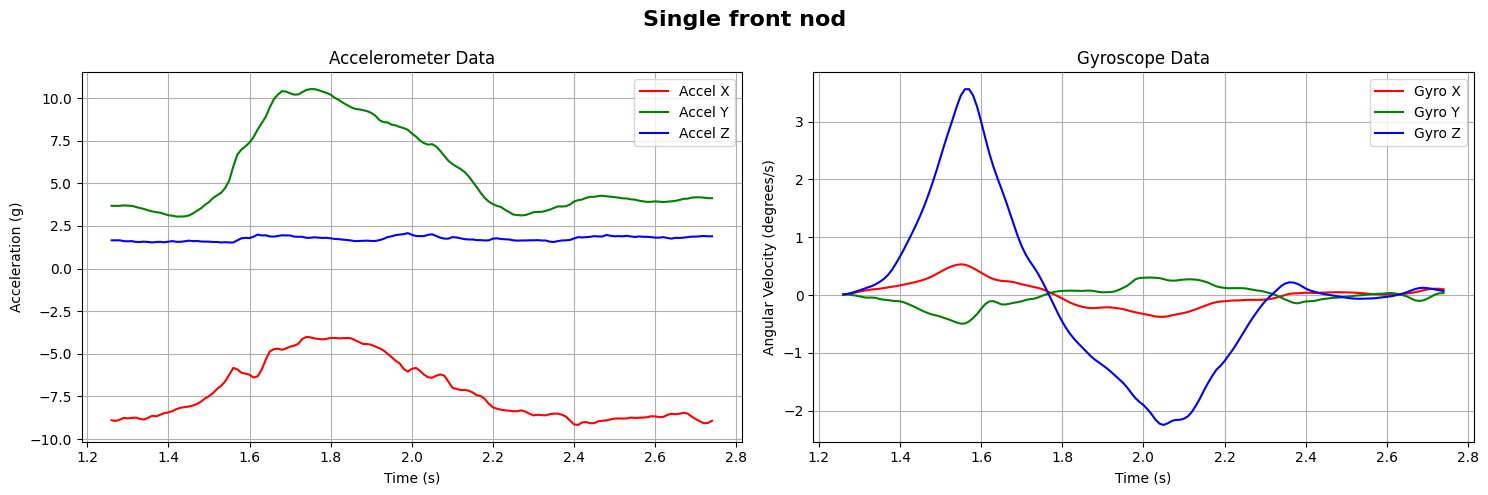

In [25]:
csv_file_acc_path_single_front_nod = '/content/drive/My Drive/BreakNeck Data/Single front nod/Accelerometer.csv'
csv_file_gyro_path_single_front_nod = '/content/drive/My Drive/BreakNeck Data/Single front nod/Gyroscope.csv'

df_acc_single_front_nod = read_acc(csv_file_acc_path_single_front_nod)
df_gyro_single_front_nod = read_gyro(csv_file_gyro_path_single_front_nod)

df_acc_single_front_nod = df_acc_single_front_nod[(df_acc_single_front_nod['elapsed (s)'] > 1.25) &
                                          (df_acc_single_front_nod['elapsed (s)'] < 2.75)]
df_gyro_single_front_nod = df_gyro_single_front_nod[(df_gyro_single_front_nod['elapsed (s)'] > 1.25) &
                                            (df_gyro_single_front_nod['elapsed (s)'] < 2.75)]

print(len(df_acc_single_front_nod))
print(len(df_gyro_single_front_nod))

plot_acc_gyro(df_acc_single_front_nod, df_gyro_single_front_nod, 'Single front nod')

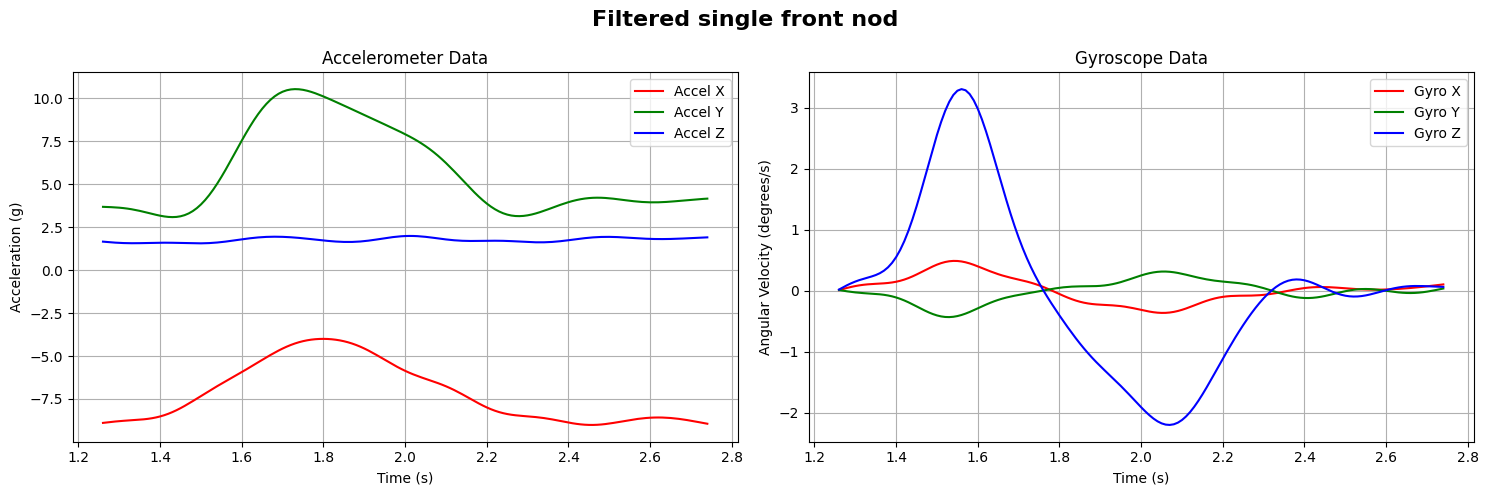

In [26]:
df_acc_single_front_nod_filtered = pd.DataFrame({
    'elapsed (s)': df_acc_single_front_nod['elapsed (s)'],
    'x-axis (g)': butter_lowpass_filter(df_acc_single_front_nod['x-axis (g)']),
    'y-axis (g)': butter_lowpass_filter(df_acc_single_front_nod['y-axis (g)']),
    'z-axis (g)': butter_lowpass_filter(df_acc_single_front_nod['z-axis (g)'])
})

df_gyro_single_front_nod_filtered = pd.DataFrame({
    'elapsed (s)': df_gyro_single_front_nod['elapsed (s)'],
    'x-axis (deg/s)': butter_lowpass_filter(df_gyro_single_front_nod['x-axis (deg/s)']),
    'y-axis (deg/s)': butter_lowpass_filter(df_gyro_single_front_nod['y-axis (deg/s)']),
    'z-axis (deg/s)': butter_lowpass_filter(df_gyro_single_front_nod['z-axis (deg/s)'])
})

plot_acc_gyro(df_acc_single_front_nod_filtered, df_gyro_single_front_nod_filtered, 'Filtered single front nod')

In [27]:
template_front_nod = {
    'data': pd.DataFrame({
    'elapsed (s)': df_acc_single_front_nod_filtered['elapsed (s)'],
    'acc': df_acc_single_front_nod_filtered['y-axis (g)'],
    'gyro': df_gyro_single_front_nod_filtered['z-axis (deg/s)'],
      }),
    'type': Match.FRONT_NOD
}
template_front_nod

{'data':      elapsed (s)       acc      gyro
 126         1.26  3.680297  0.017542
 127         1.27  3.671969  0.054405
 128         1.28  3.661972  0.089241
 129         1.29  3.648739  0.120912
 130         1.30  3.630872  0.148746
 ..           ...       ...       ...
 270         2.70  4.088408  0.072120
 271         2.71  4.108378  0.069001
 272         2.72  4.126751  0.065802
 273         2.73  4.143299  0.062988
 274         2.74  4.157936  0.060961
 
 [149 rows x 3 columns],
 'type': <Match.FRONT_NOD: 3>}

## Back nod template construction

149
149


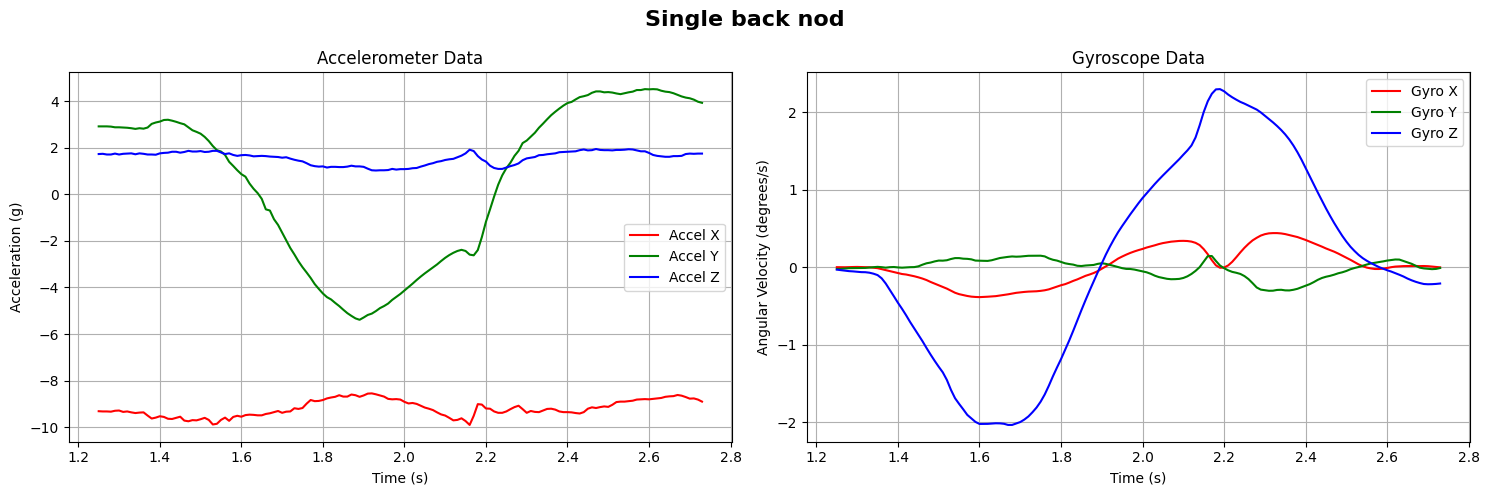

In [28]:
csv_file_acc_path_single_back_nod = '/content/drive/My Drive/BreakNeck Data/Single back nod/Accelerometer.csv'
csv_file_gyro_path_single_back_nod = '/content/drive/My Drive/BreakNeck Data/Single back nod/Gyroscope.csv'

df_acc_single_back_nod = read_acc(csv_file_acc_path_single_back_nod)
df_gyro_single_back_nod = read_gyro(csv_file_gyro_path_single_back_nod)

df_acc_single_back_nod = df_acc_single_back_nod[(df_acc_single_back_nod['elapsed (s)'] >= 1.25) &
                                          (df_acc_single_back_nod['elapsed (s)'] <= 2.73)]
df_gyro_single_back_nod = df_gyro_single_back_nod[(df_gyro_single_back_nod['elapsed (s)'] >= 1.25) &
                                            (df_gyro_single_back_nod['elapsed (s)'] <= 2.73)]

print(len(df_acc_single_back_nod))
print(len(df_gyro_single_back_nod))

plot_acc_gyro(df_acc_single_back_nod, df_gyro_single_back_nod, 'Single back nod')

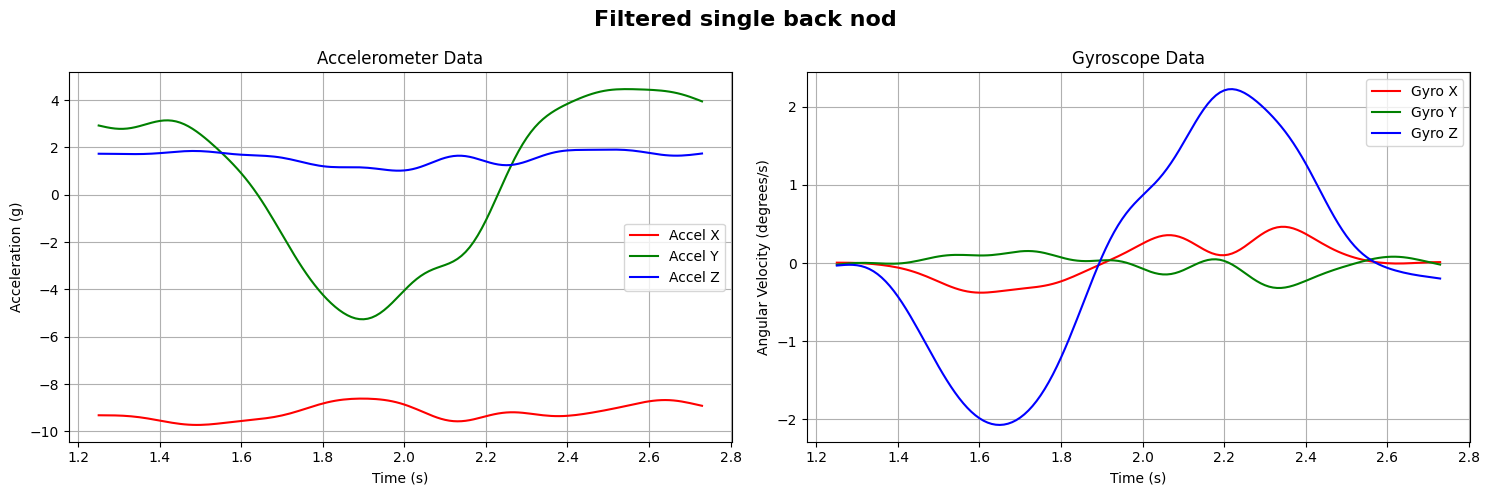

In [29]:
df_acc_single_back_nod_filtered = pd.DataFrame({
    'elapsed (s)': df_acc_single_back_nod['elapsed (s)'],
    'x-axis (g)': butter_lowpass_filter(df_acc_single_back_nod['x-axis (g)']),
    'y-axis (g)': butter_lowpass_filter(df_acc_single_back_nod['y-axis (g)']),
    'z-axis (g)': butter_lowpass_filter(df_acc_single_back_nod['z-axis (g)'])
})

df_gyro_single_back_nod_filtered = pd.DataFrame({
    'elapsed (s)': df_gyro_single_back_nod['elapsed (s)'],
    'x-axis (deg/s)': butter_lowpass_filter(df_gyro_single_back_nod['x-axis (deg/s)']),
    'y-axis (deg/s)': butter_lowpass_filter(df_gyro_single_back_nod['y-axis (deg/s)']),
    'z-axis (deg/s)': butter_lowpass_filter(df_gyro_single_back_nod['z-axis (deg/s)'])
})

plot_acc_gyro(df_acc_single_back_nod_filtered, df_gyro_single_back_nod_filtered, 'Filtered single back nod')

In [30]:
template_back_nod = {
    'data': pd.DataFrame({
    'elapsed (s)': df_acc_single_back_nod_filtered['elapsed (s)'],
    'acc': df_acc_single_back_nod_filtered['y-axis (g)'],
    'gyro': df_gyro_single_back_nod_filtered['z-axis (deg/s)'],
      }),
    'type': Match.BACK_NOD
}
template_back_nod

{'data':      elapsed (s)       acc      gyro
 125         1.25  2.924358 -0.032140
 126         1.26  2.885526 -0.027612
 127         1.27  2.849074 -0.023918
 128         1.28  2.818206 -0.022159
 129         1.29  2.795716 -0.023401
 ..           ...       ...       ...
 269         2.69  4.193395 -0.168943
 270         2.70  4.137332 -0.176208
 271         2.71  4.076124 -0.183278
 272         2.72  4.010941 -0.190469
 273         2.73  3.943183 -0.198115
 
 [149 rows x 3 columns],
 'type': <Match.BACK_NOD: 4>}

# Verification matching

In [31]:
pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512545 sha256=05df77232a64e940124f733bb28b21830bb0abc343e8d679fd1ab215673f5a89
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [32]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# System Parameters

window_size = min(len(template_right_tilt['data']), len(template_left_tilt['data']))
step_size = 25
skip_size = window_size // 2
start = 0
threshold = 22.00
ratio_acc_gyro = 2/5

templates = [template_right_tilt, template_left_tilt, template_front_nod, template_back_nod]

# Returns which axis in accelerometer needs to be compared to for the given type
def acc_axis(type, window):
  if type.value < 3:
    return window['z-axis (g)'].to_numpy().reshape(1,-1)
  else:
    return window['y-axis (g)'].to_numpy().reshape(1,-1)

# Returns which axis in gyroscope needs to be compared to for the given type
def gyro_axis(type, window):
  if type.value < 3:
    return window['y-axis (deg/s)'].to_numpy().reshape(1,-1)
  else:
    return window['z-axis (deg/s)'].to_numpy().reshape(1,-1)

# Function to compare a window of incoming signals with all the templates to determine if its a valid gesture or not
def matcher(window_acc, window_gyro, start, plot = False):

  matches = []

  for template in templates:
    template_acc = template['data']['acc'].to_numpy().reshape(1,-1)
    template_gyro = template['data']['gyro'].to_numpy().reshape(1,-1)

    acc_distance, _ = fastdtw(template_acc, acc_axis(template['type'], window_acc), dist=euclidean)
    gyro_distance, _ = fastdtw(template_gyro, gyro_axis(template['type'], window_gyro), dist=euclidean)

    combined_distance = ((ratio_acc_gyro) * acc_distance + (1 - ratio_acc_gyro) * gyro_distance)

    if combined_distance < threshold:
      matches.append({
        'start_index': start,
        'end_index': start + window_size,
        'dtw_distance': combined_distance,
        'type': template['type']
      })

  final_ans = None
  if len(matches)>0:
    for match in matches:
      if final_ans is None:
        final_ans = match
      elif final_ans.dtw_distance > match.dtw_distance:
        final_ans = match
  if final_ans is not None:
    if plot:
      compare_plotter(final_ans, acc_axis(final_ans['type'], window_acc), gyro_axis(final_ans['type'], window_gyro), templates[final_ans['type'].value-1]['data']['acc'].to_numpy().reshape(1,-1), templates[final_ans['type'].value-1]['data']['gyro'].to_numpy().reshape(1,-1), title=final_ans['type'].name)
  return final_ans

# Function that receives continuous data, slices it in windows and passes to matcher() for identifying if any gesture has been made in that particular window
def match_tilt(data_acc, data_gyro, plot=False):

  matches = []

  start = 0

  while start <= min(len(data_acc), len(data_gyro)) - window_size:

    last_checked_index = start
    window_acc = data_acc.iloc[start:start+window_size]
    window_gyro = data_gyro.iloc[start:start+window_size]

    matched = matcher(window_acc, window_gyro, start, plot)

    if matched != None:
      matches.append(matched)
      start += skip_size
    else:
      start += step_size

  return matches

# Function to plot the window in correspondence with the matched template
def compare_plotter(match, data_acc, data_gyro, template_acc, template_gyro, title):

  print(f"{match['type'].name} match from index {match['start_index']} to {match['end_index']}, DTW Distance: {match['dtw_distance']}")

  match_start = match['start_index']
  match_end = match['end_index']

  match_window_acc_z = data_acc.reshape(-1)
  match_window_gyro_y = data_gyro.reshape(-1)

  fig, axs = plt.subplots(1, 2, figsize=(15, 5))

  axs[0].plot(range(1, len(template_acc.reshape(-1)) + 1), template_acc.reshape(-1), label='Template', linestyle='--', color='blue')
  axs[0].plot(range(1, match_end - match_start + 1), match_window_acc_z, linewidth=2, label='Matched Window')
  axs[0].set_title('Accelerometer: Template vs Matched Window')
  axs[0].set_ylabel('Acceleration (g)')
  axs[0].legend()
  axs[0].grid(True)

  axs[1].plot(range(1, len(template_gyro.reshape(-1)) + 1), template_gyro.reshape(-1), label='Template', linestyle='--', color='blue')
  axs[1].plot(range(1, match_end - match_start + 1), match_window_gyro_y, linewidth=2, label='Matched Window')
  axs[1].set_title('Gyroscope: Template vs Matched Window')
  axs[1].set_ylabel('Angular Velocity (degrees/s)')
  axs[1].legend()
  axs[1].grid(True)

  if title:
    plt.suptitle(title, fontsize=16, fontweight='bold')

  plt.tight_layout()
  plt.show()

RIGHT_TILT match from index 125 to 274, DTW Distance: 5.236204314588308


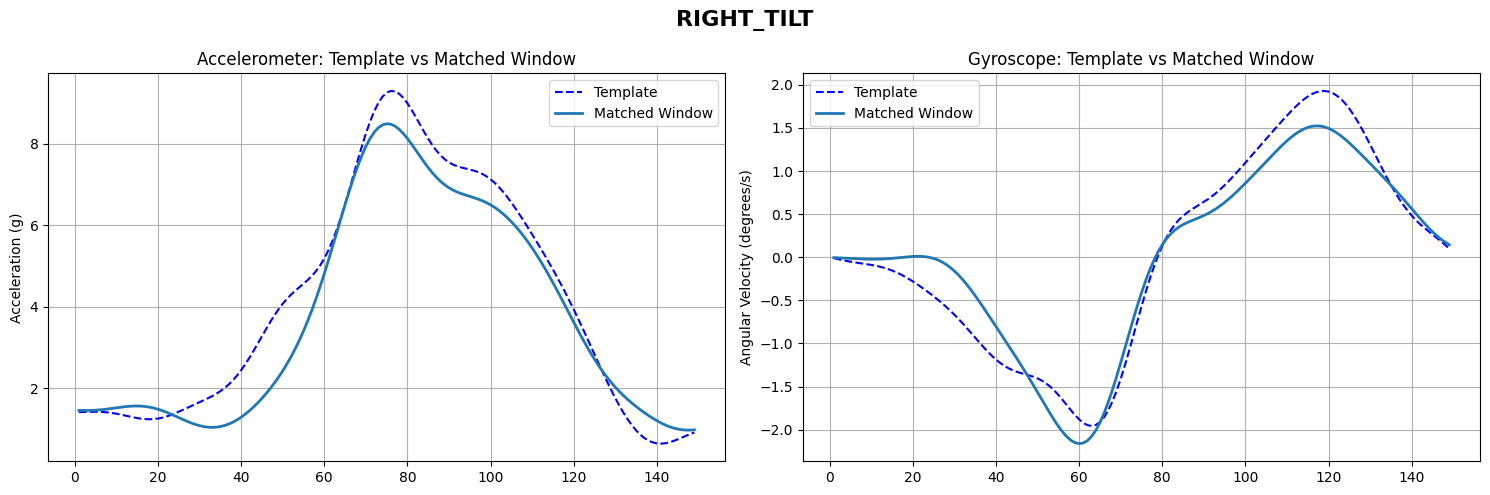

RIGHT_TILT match from index 274 to 423, DTW Distance: 8.565966258254797


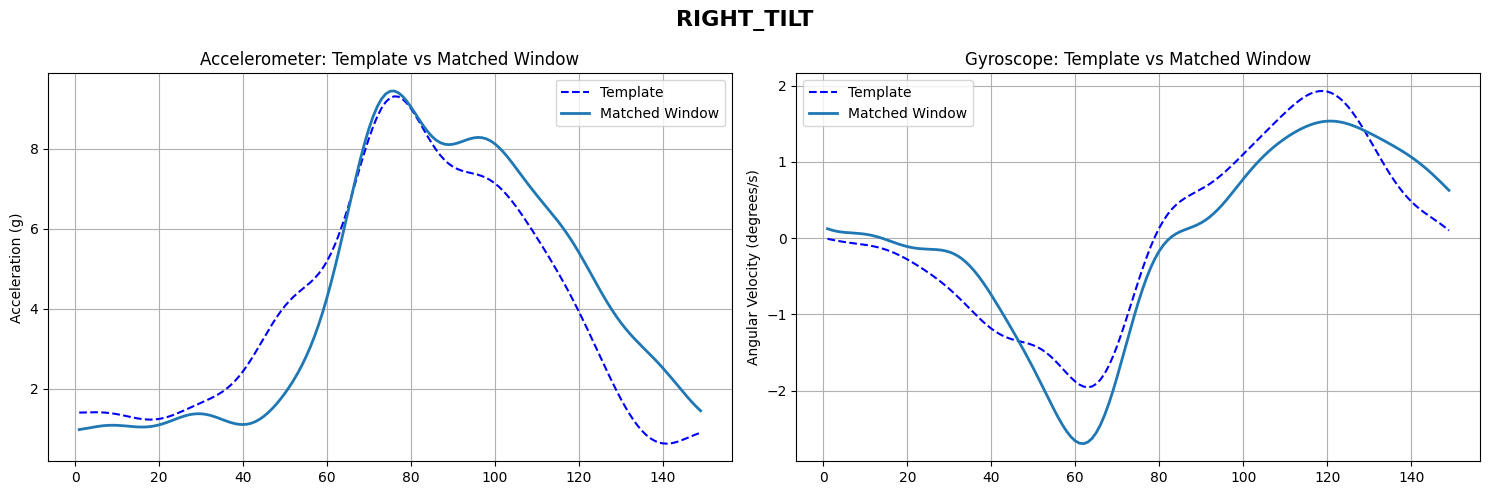

RIGHT_TILT match from index 448 to 597, DTW Distance: 7.155476256004977


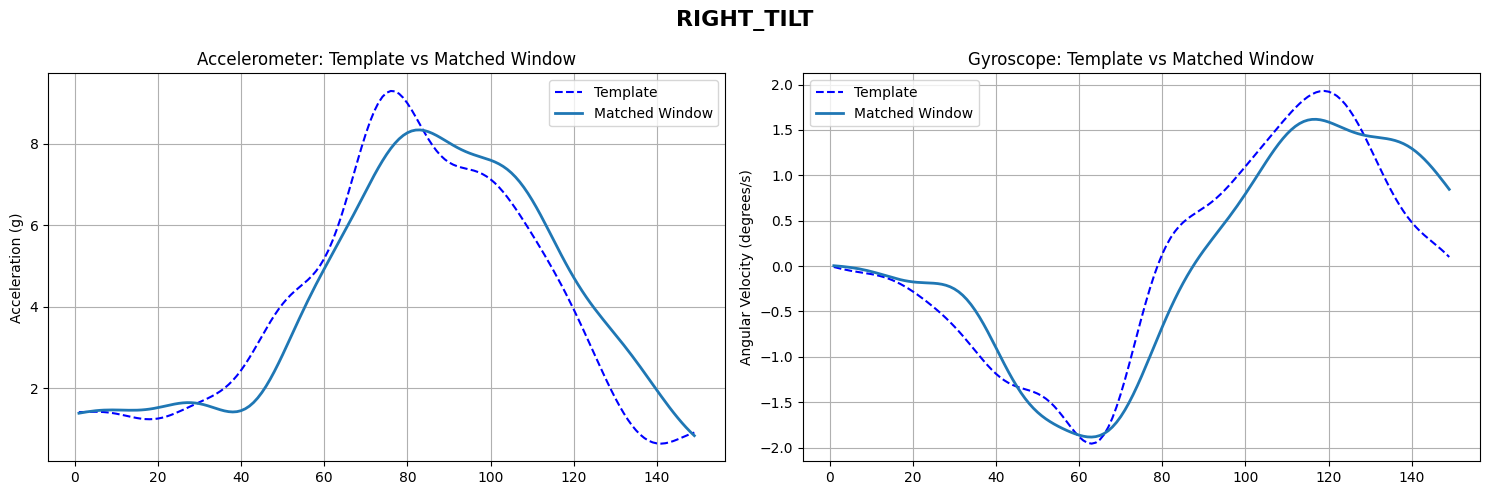

RIGHT_TILT match from index 622 to 771, DTW Distance: 13.265182873192906


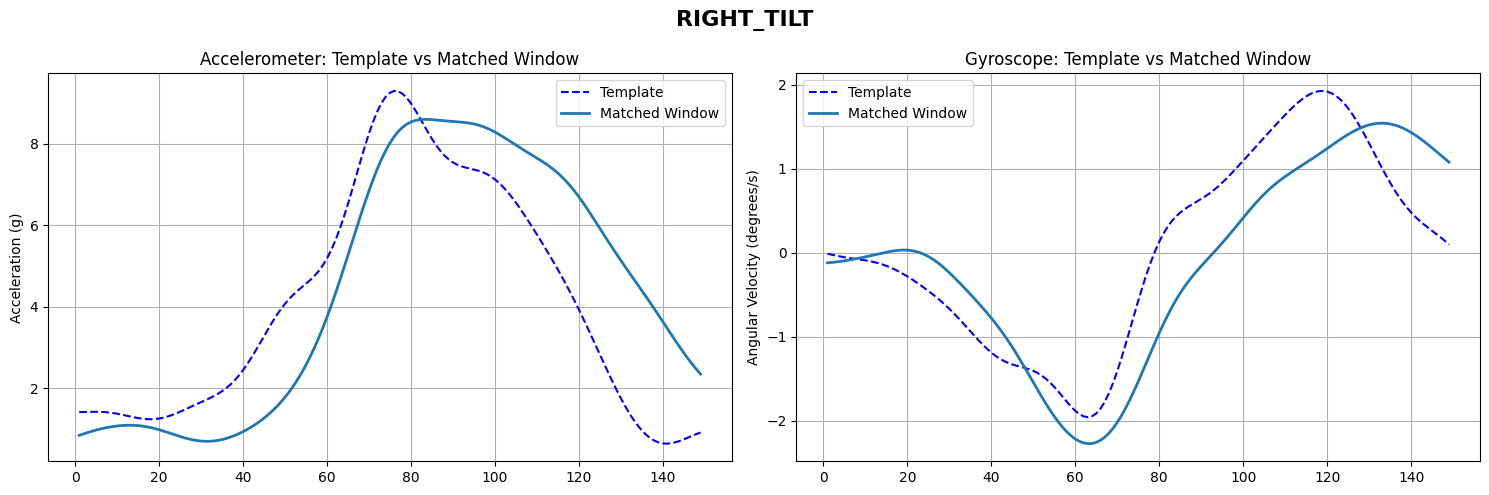

RIGHT_TILT match from index 821 to 970, DTW Distance: 8.588609623414445


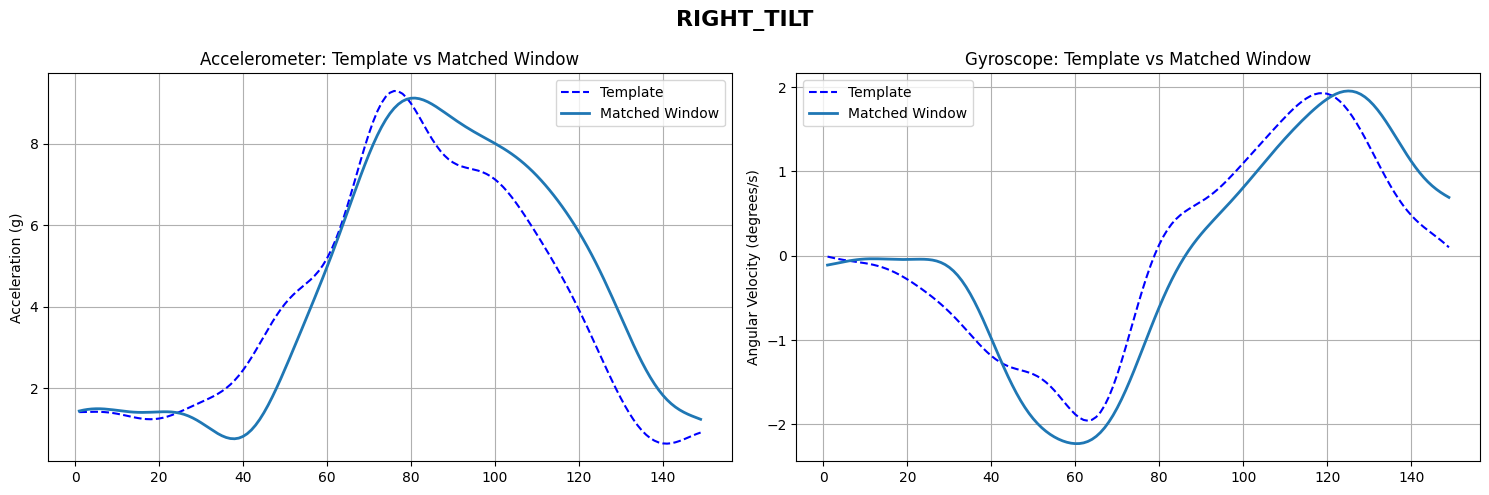

RIGHT_TILT match from index 995 to 1144, DTW Distance: 11.508596037695966


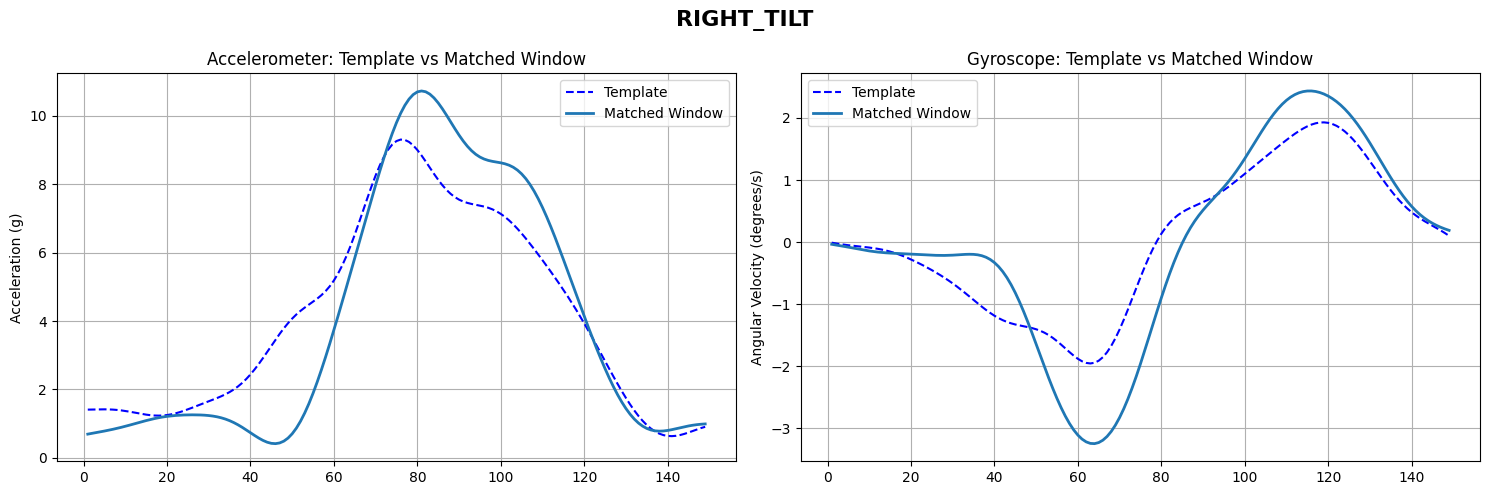

[{'start_index': 125,
  'end_index': 274,
  'dtw_distance': 5.236204314588308,
  'type': <Match.RIGHT_TILT: 1>},
 {'start_index': 274,
  'end_index': 423,
  'dtw_distance': 8.565966258254797,
  'type': <Match.RIGHT_TILT: 1>},
 {'start_index': 448,
  'end_index': 597,
  'dtw_distance': 7.155476256004977,
  'type': <Match.RIGHT_TILT: 1>},
 {'start_index': 622,
  'end_index': 771,
  'dtw_distance': 13.265182873192906,
  'type': <Match.RIGHT_TILT: 1>},
 {'start_index': 821,
  'end_index': 970,
  'dtw_distance': 8.588609623414445,
  'type': <Match.RIGHT_TILT: 1>},
 {'start_index': 995,
  'end_index': 1144,
  'dtw_distance': 11.508596037695966,
  'type': <Match.RIGHT_TILT: 1>}]

In [33]:
# Verification on Right tilts
match_tilt(df_acc_right_tilt_filtered, df_gyro_right_tilt_filtered, True)

LEFT_TILT match from index 125 to 274, DTW Distance: 19.04626506557456


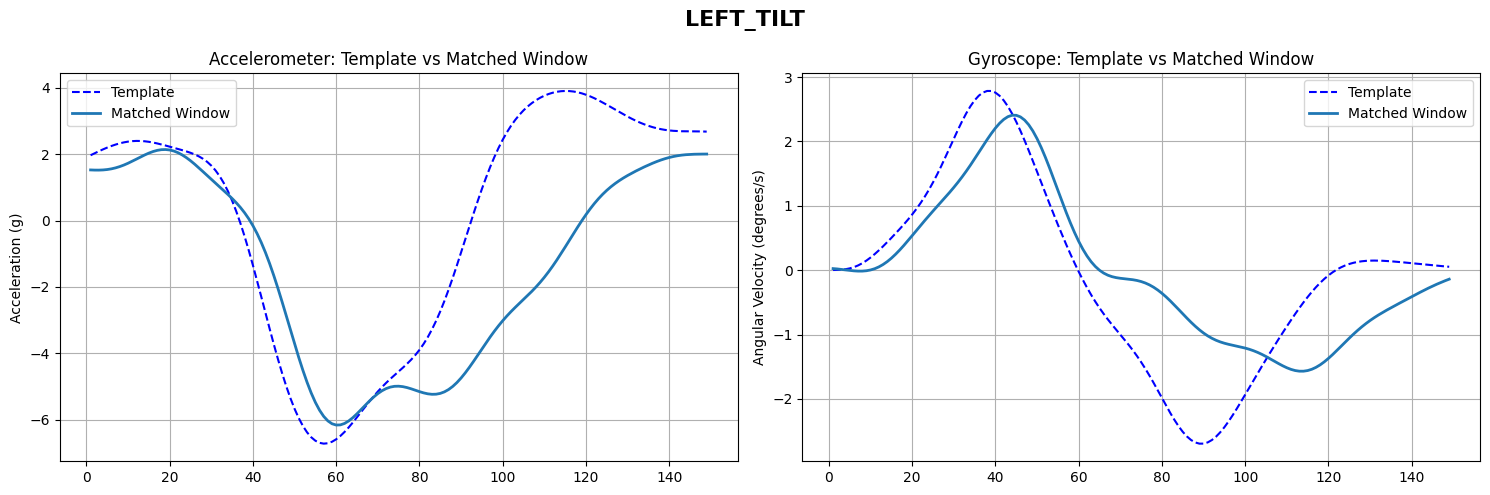

LEFT_TILT match from index 274 to 423, DTW Distance: 18.459589407776022


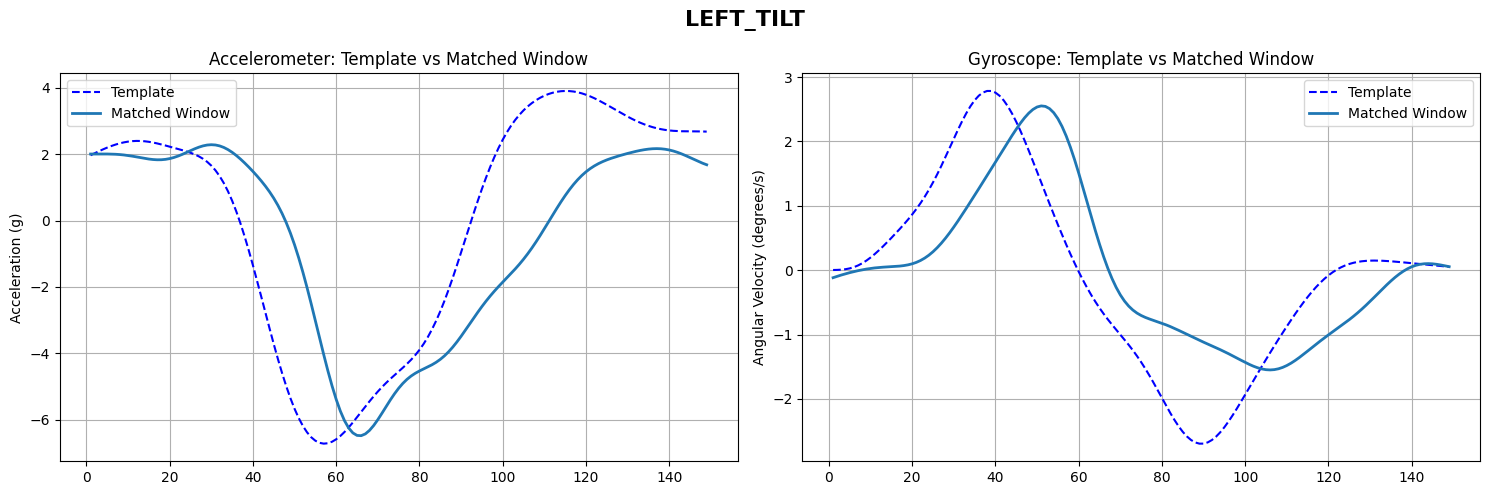

LEFT_TILT match from index 423 to 572, DTW Distance: 11.174792319055149


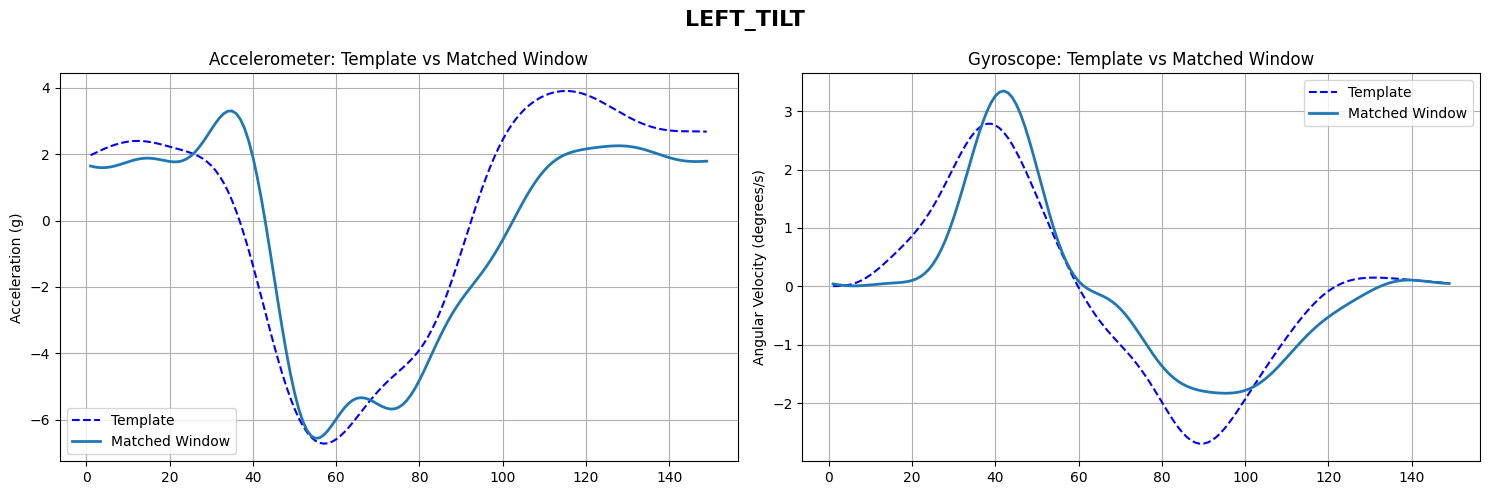

LEFT_TILT match from index 572 to 721, DTW Distance: 21.658867391421246


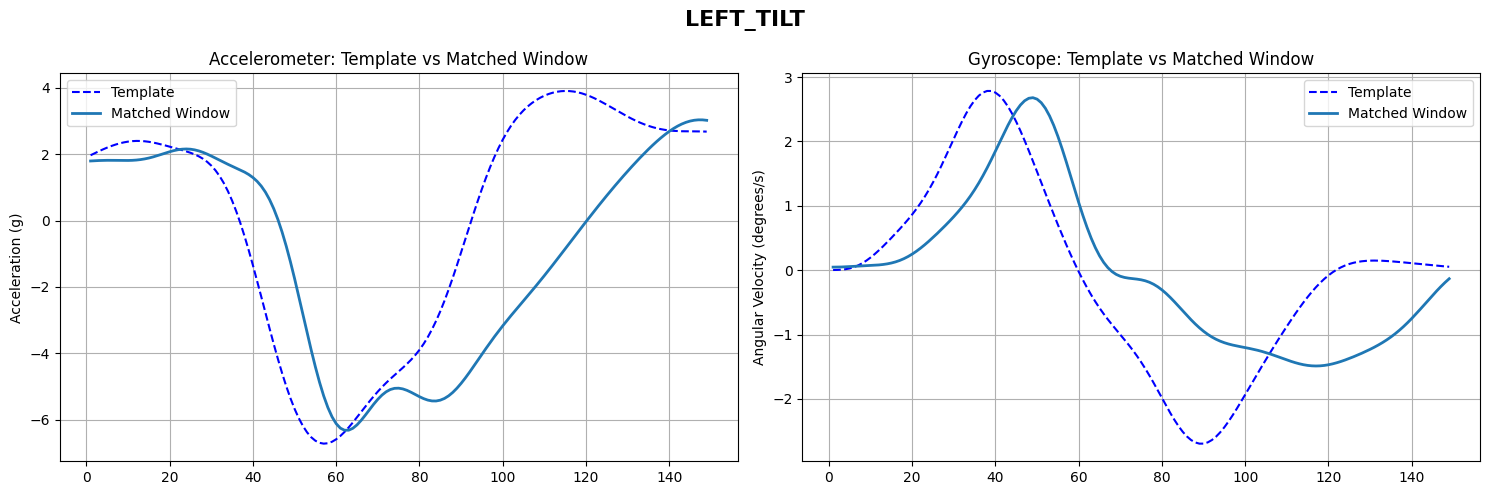

LEFT_TILT match from index 746 to 895, DTW Distance: 15.906361672730966


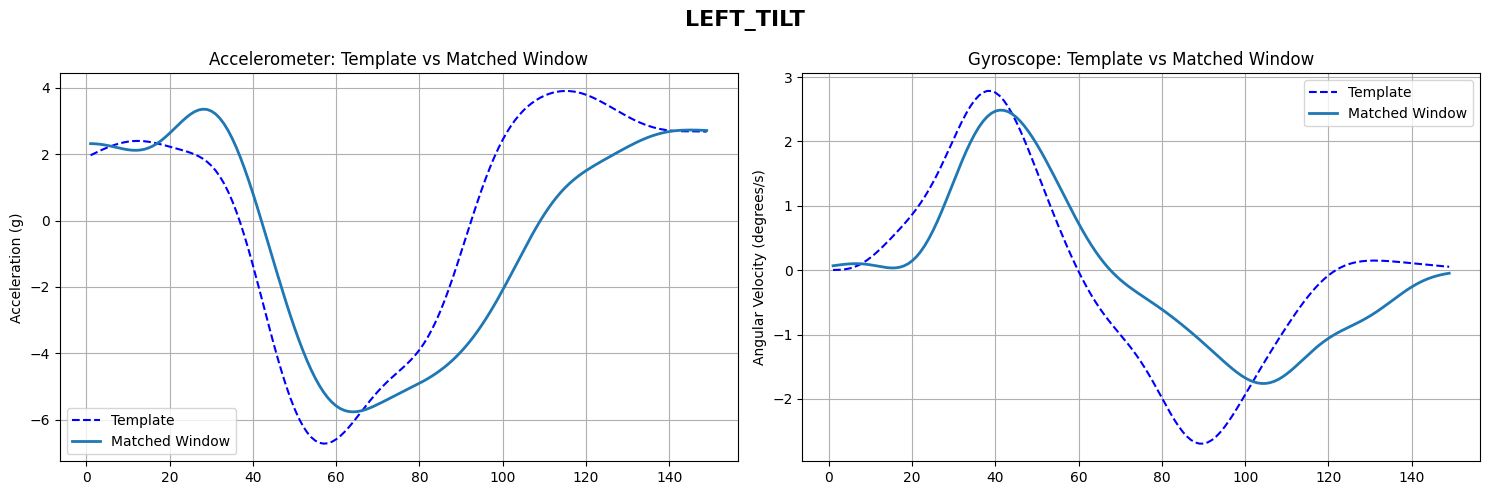

LEFT_TILT match from index 945 to 1094, DTW Distance: 15.65199828180748


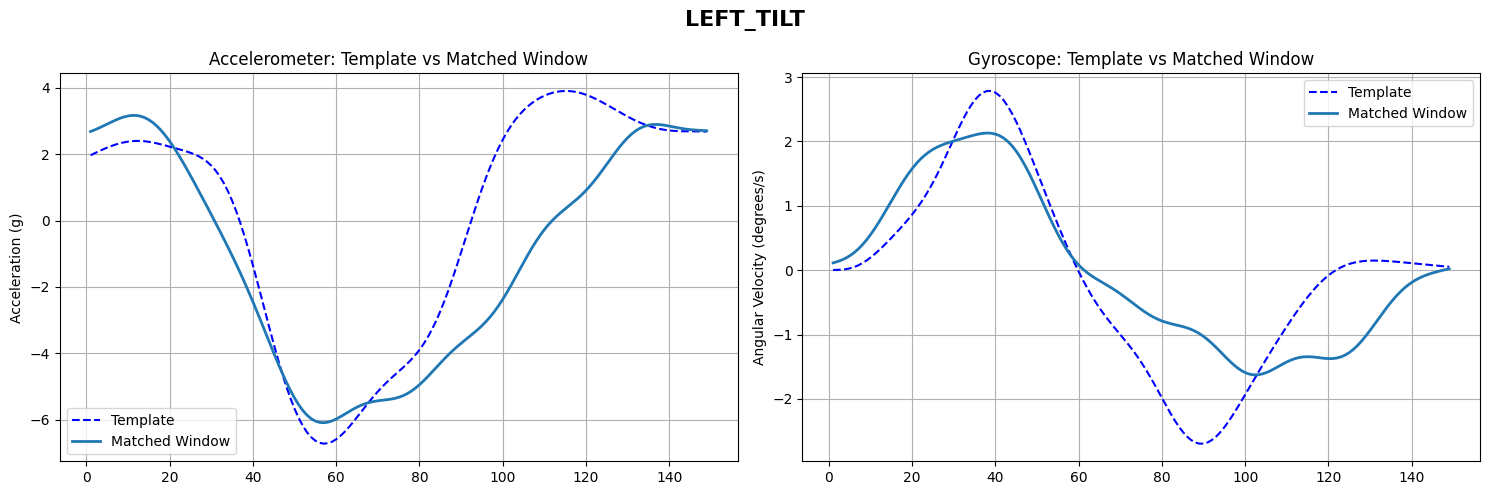

[{'start_index': 125,
  'end_index': 274,
  'dtw_distance': 19.04626506557456,
  'type': <Match.LEFT_TILT: 2>},
 {'start_index': 274,
  'end_index': 423,
  'dtw_distance': 18.459589407776022,
  'type': <Match.LEFT_TILT: 2>},
 {'start_index': 423,
  'end_index': 572,
  'dtw_distance': 11.174792319055149,
  'type': <Match.LEFT_TILT: 2>},
 {'start_index': 572,
  'end_index': 721,
  'dtw_distance': 21.658867391421246,
  'type': <Match.LEFT_TILT: 2>},
 {'start_index': 746,
  'end_index': 895,
  'dtw_distance': 15.906361672730966,
  'type': <Match.LEFT_TILT: 2>},
 {'start_index': 945,
  'end_index': 1094,
  'dtw_distance': 15.65199828180748,
  'type': <Match.LEFT_TILT: 2>}]

In [34]:
# Verification on left tilts
match_tilt(df_acc_left_tilt_filtered, df_gyro_left_tilt_filtered, True)

FRONT_NOD match from index 125 to 274, DTW Distance: 7.400368960198941


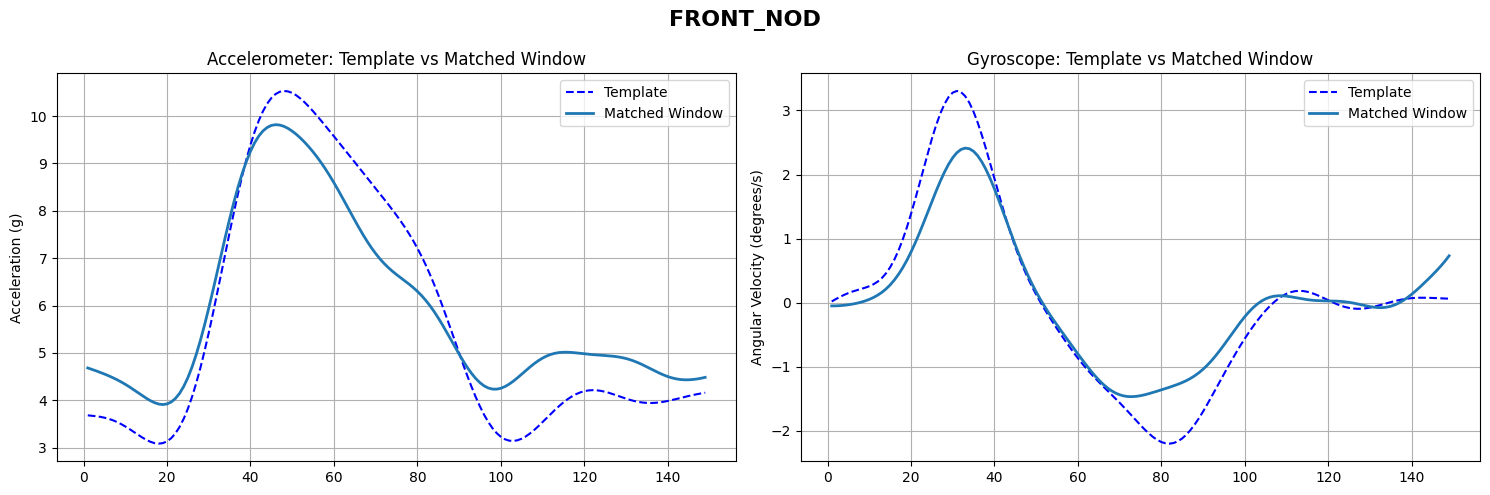

FRONT_NOD match from index 249 to 398, DTW Distance: 13.746381672918641


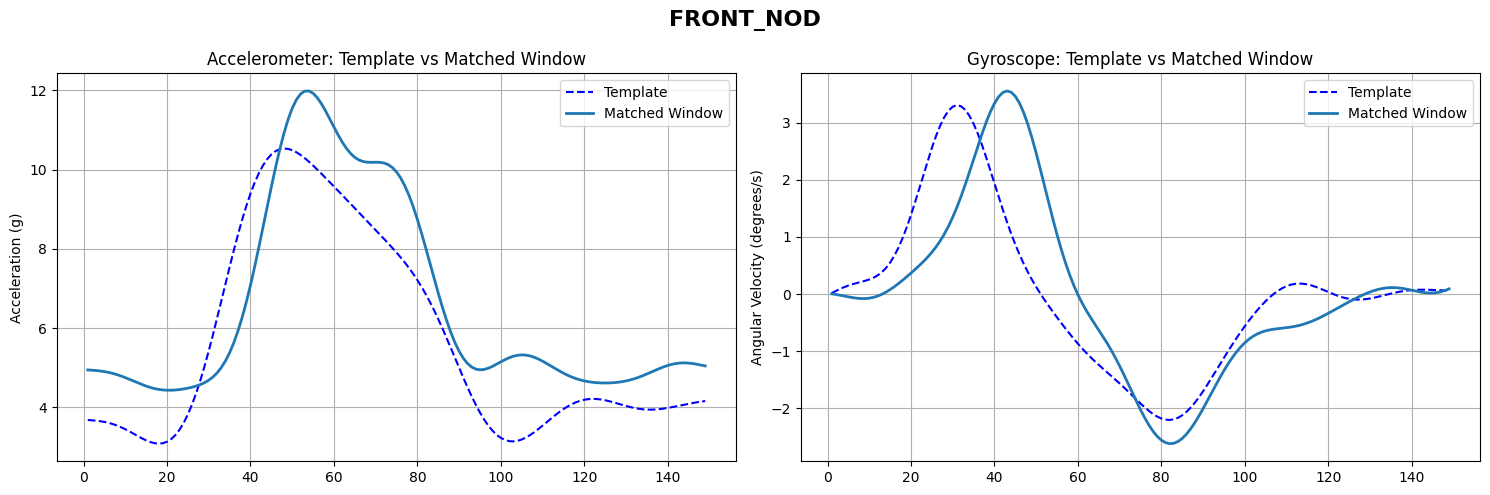

FRONT_NOD match from index 398 to 547, DTW Distance: 9.444239328645727


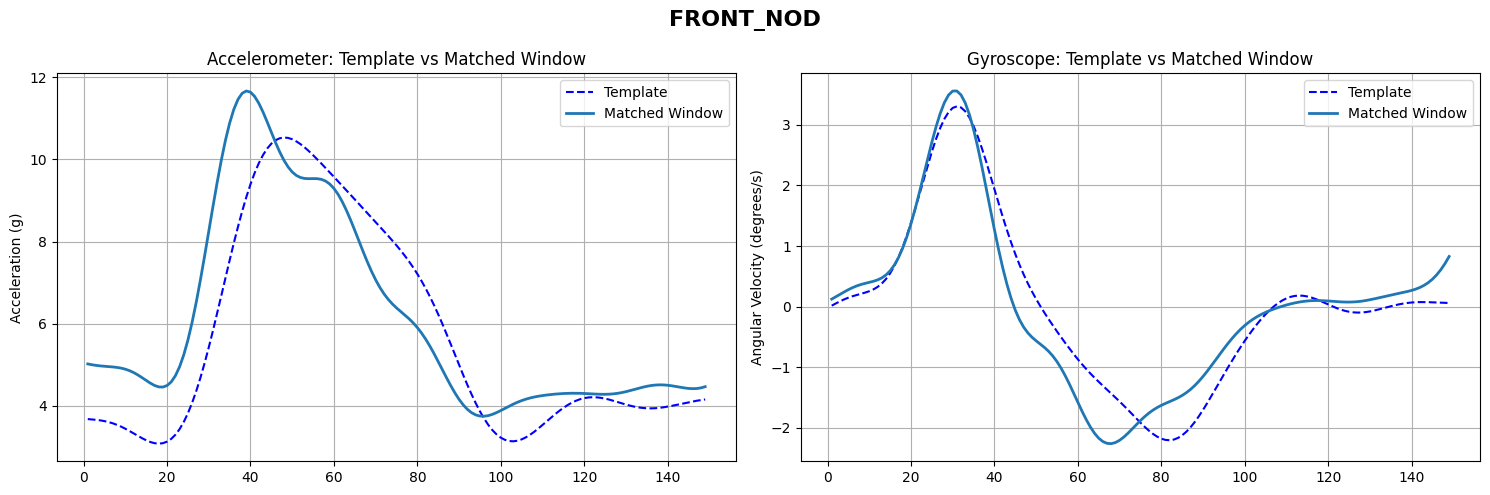

FRONT_NOD match from index 522 to 671, DTW Distance: 13.982902850943823


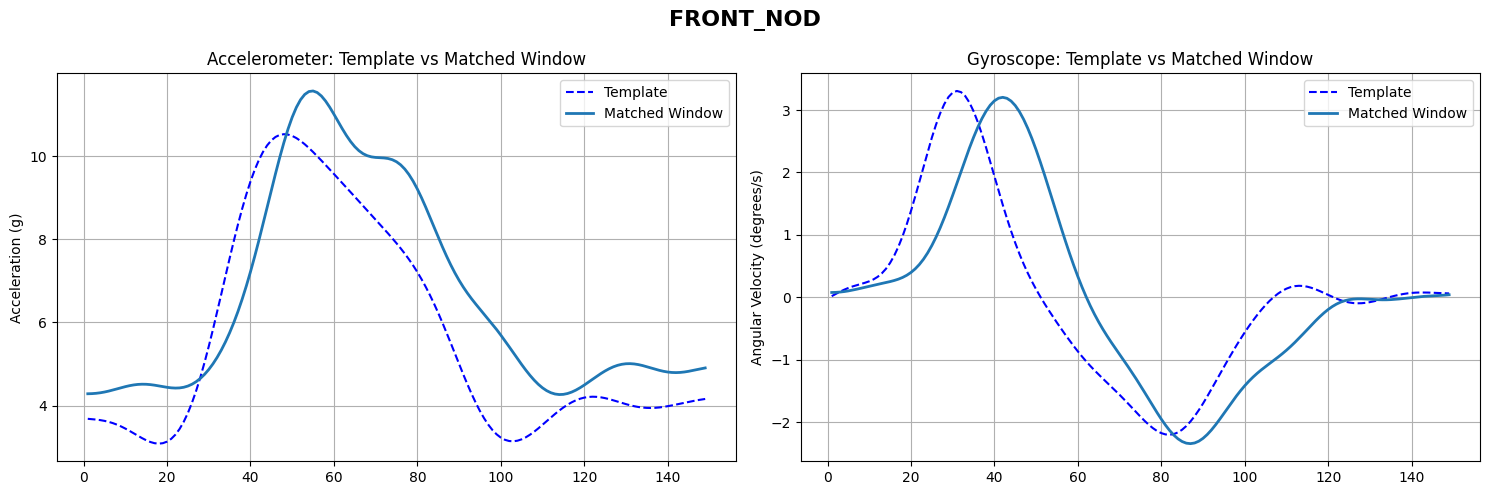

FRONT_NOD match from index 671 to 820, DTW Distance: 9.041324419706843


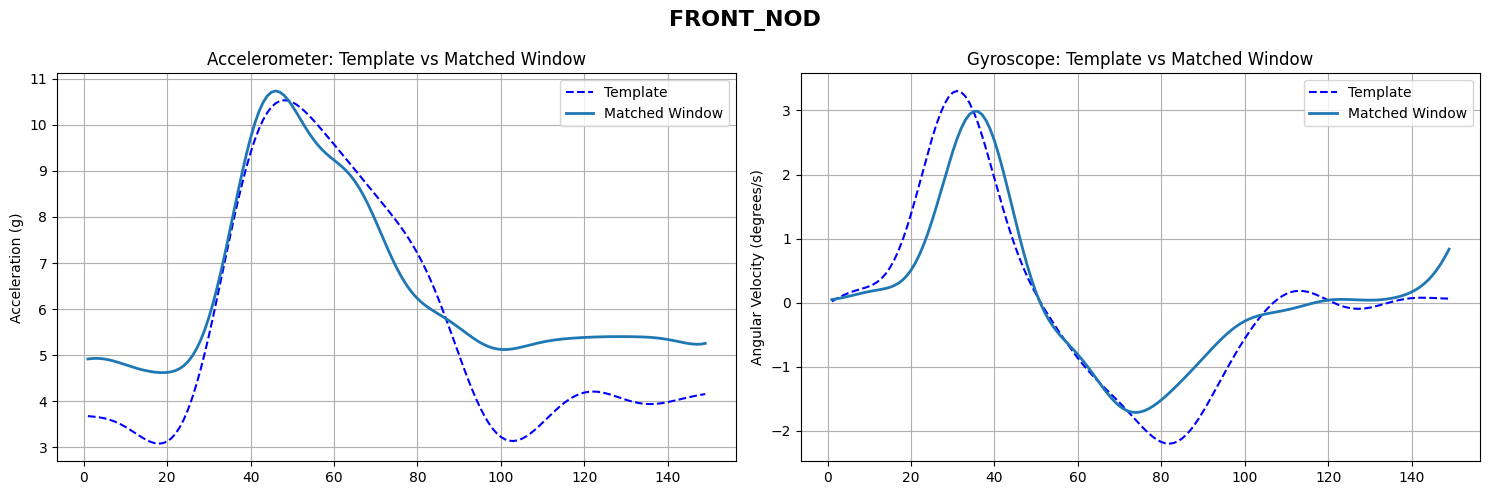

FRONT_NOD match from index 795 to 944, DTW Distance: 10.272750556778414


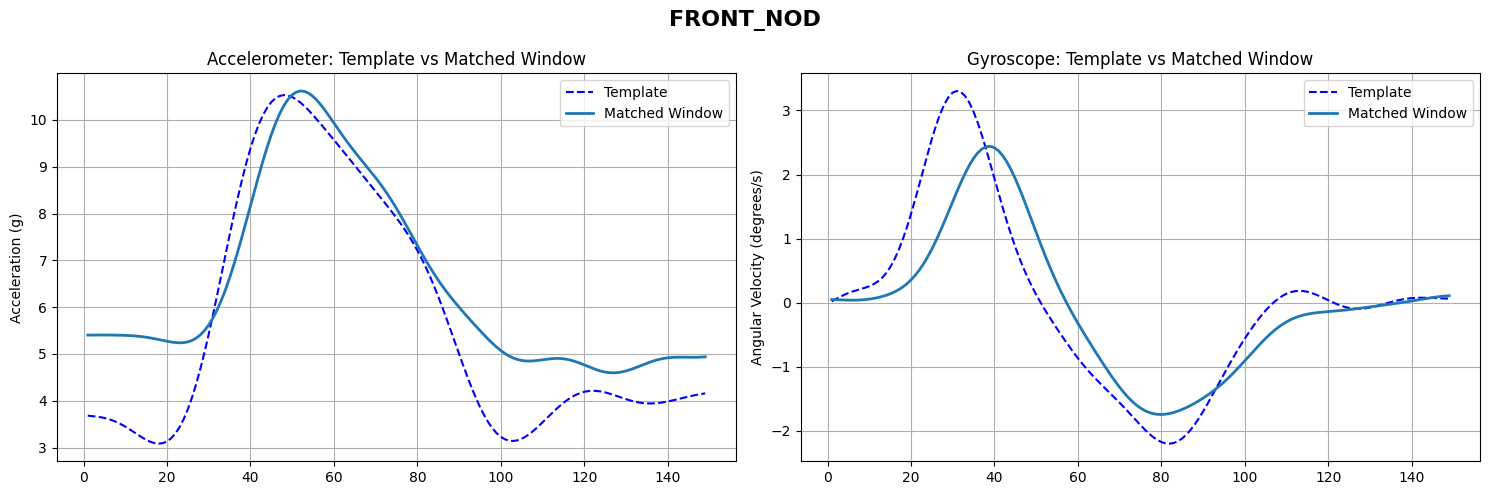

[{'start_index': 125,
  'end_index': 274,
  'dtw_distance': 7.400368960198941,
  'type': <Match.FRONT_NOD: 3>},
 {'start_index': 249,
  'end_index': 398,
  'dtw_distance': 13.746381672918641,
  'type': <Match.FRONT_NOD: 3>},
 {'start_index': 398,
  'end_index': 547,
  'dtw_distance': 9.444239328645727,
  'type': <Match.FRONT_NOD: 3>},
 {'start_index': 522,
  'end_index': 671,
  'dtw_distance': 13.982902850943823,
  'type': <Match.FRONT_NOD: 3>},
 {'start_index': 671,
  'end_index': 820,
  'dtw_distance': 9.041324419706843,
  'type': <Match.FRONT_NOD: 3>},
 {'start_index': 795,
  'end_index': 944,
  'dtw_distance': 10.272750556778414,
  'type': <Match.FRONT_NOD: 3>}]

In [35]:
# Verification on front nods
match_tilt(df_acc_front_nod_filtered, df_gyro_front_nod_filtered, True)

BACK_NOD match from index 75 to 224, DTW Distance: 14.409861715653502


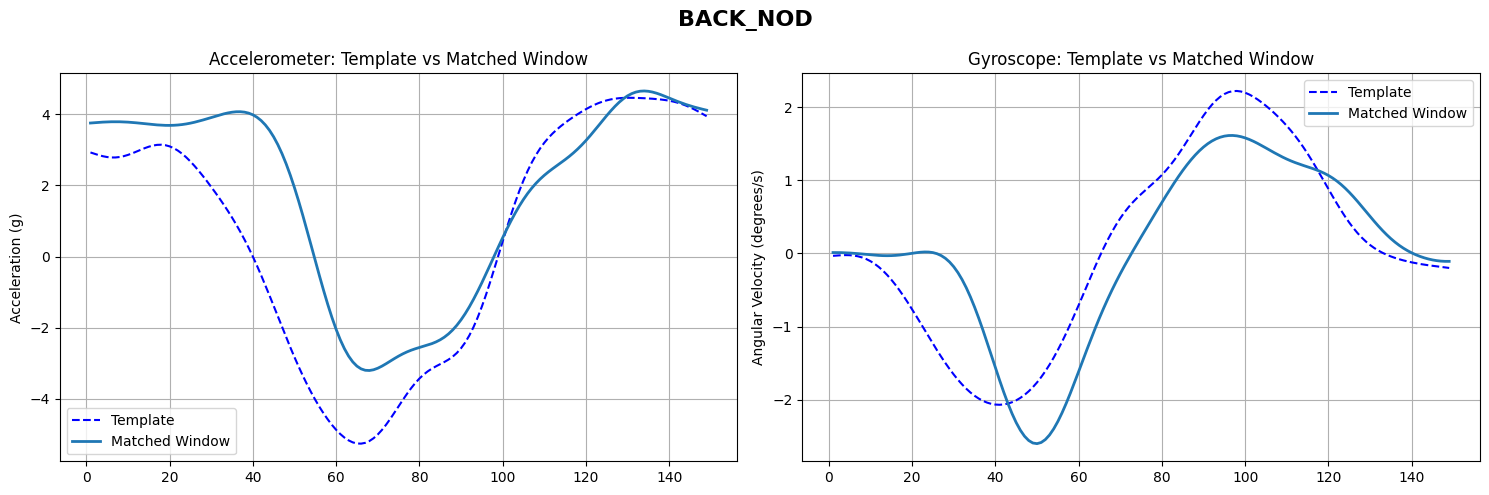

BACK_NOD match from index 224 to 373, DTW Distance: 7.494000631765584


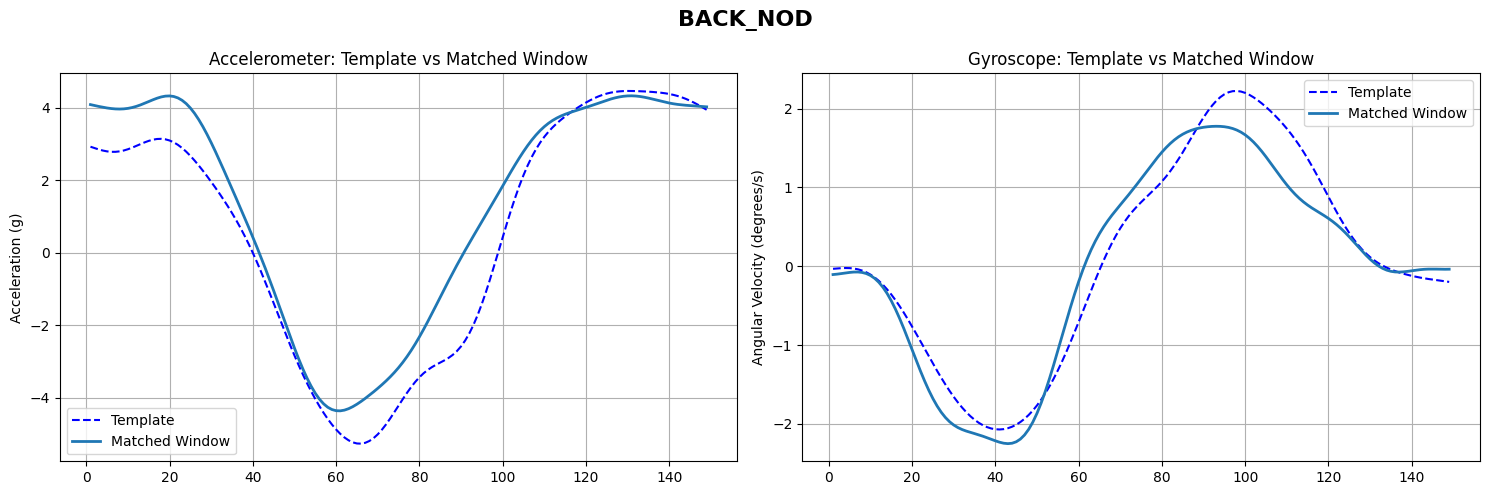

BACK_NOD match from index 348 to 497, DTW Distance: 21.722840554943126


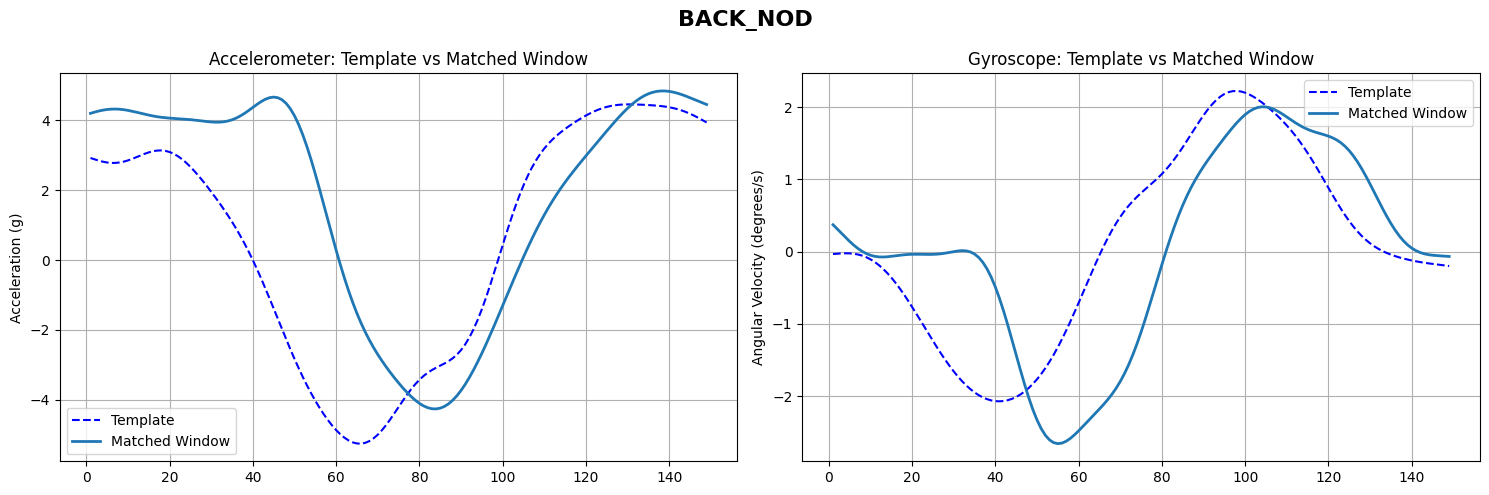

BACK_NOD match from index 522 to 671, DTW Distance: 11.152377631084397


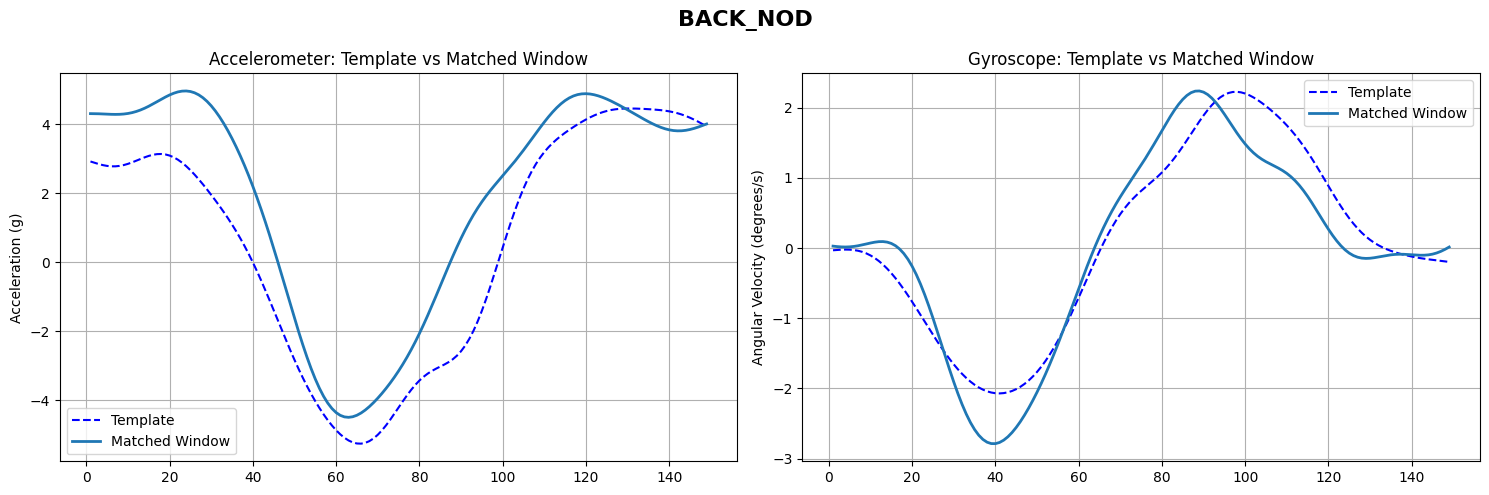

BACK_NOD match from index 671 to 820, DTW Distance: 15.383113291227616


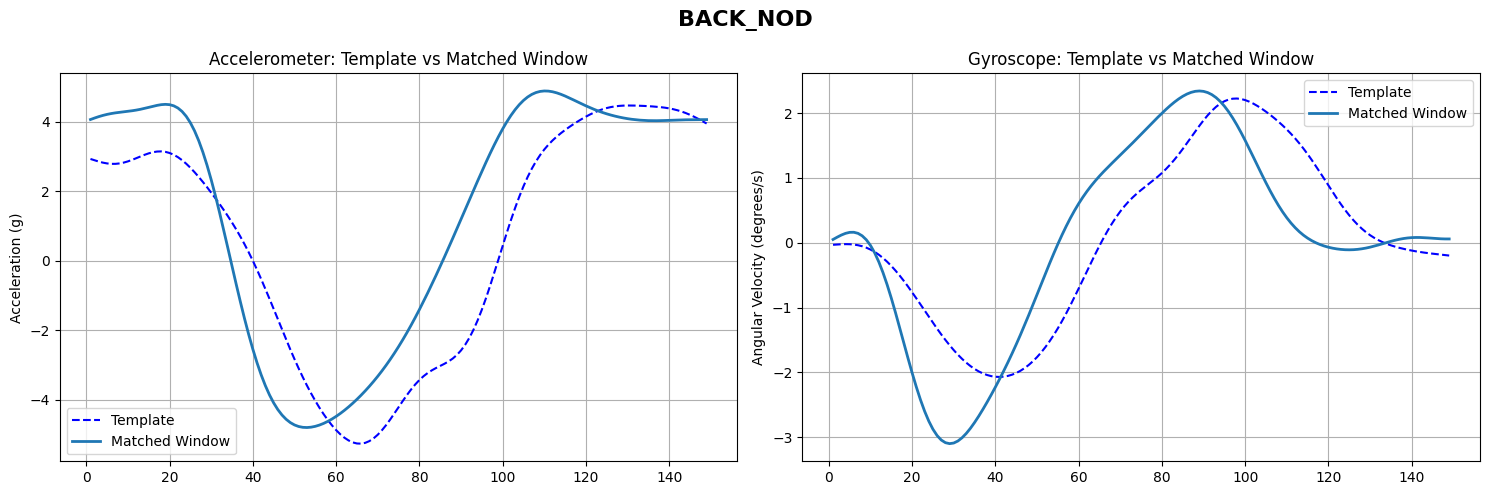

BACK_NOD match from index 820 to 969, DTW Distance: 10.666566553011936


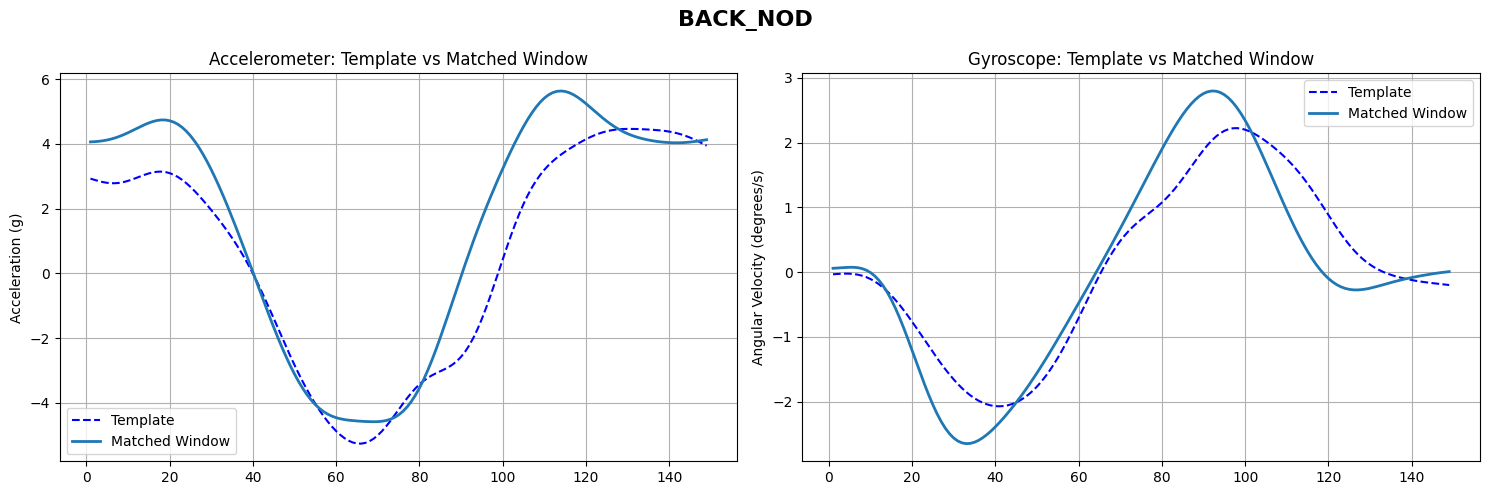

[{'start_index': 75,
  'end_index': 224,
  'dtw_distance': 14.409861715653502,
  'type': <Match.BACK_NOD: 4>},
 {'start_index': 224,
  'end_index': 373,
  'dtw_distance': 7.494000631765584,
  'type': <Match.BACK_NOD: 4>},
 {'start_index': 348,
  'end_index': 497,
  'dtw_distance': 21.722840554943126,
  'type': <Match.BACK_NOD: 4>},
 {'start_index': 522,
  'end_index': 671,
  'dtw_distance': 11.152377631084397,
  'type': <Match.BACK_NOD: 4>},
 {'start_index': 671,
  'end_index': 820,
  'dtw_distance': 15.383113291227616,
  'type': <Match.BACK_NOD: 4>},
 {'start_index': 820,
  'end_index': 969,
  'dtw_distance': 10.666566553011936,
  'type': <Match.BACK_NOD: 4>}]

In [36]:
# Verification on back nods
match_tilt(df_acc_back_nod_filtered, df_gyro_back_nod_filtered, True)

LEFT_TILT match from index 0 to 149, DTW Distance: 20.233104340673133


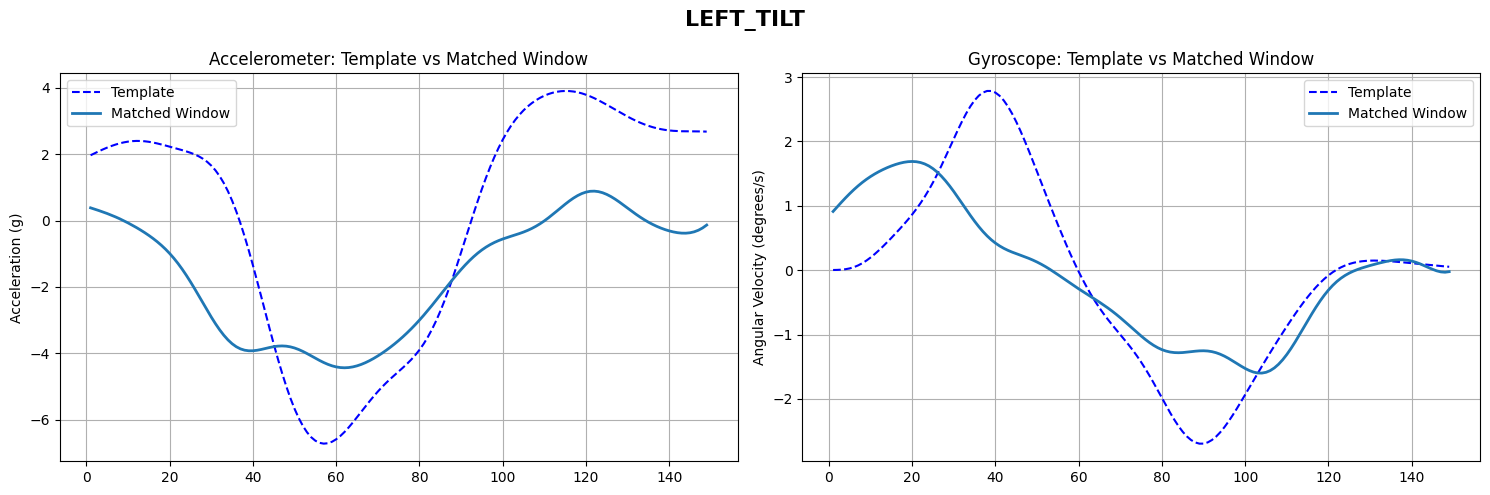

LEFT_TILT match from index 149 to 298, DTW Distance: 15.814588592488388


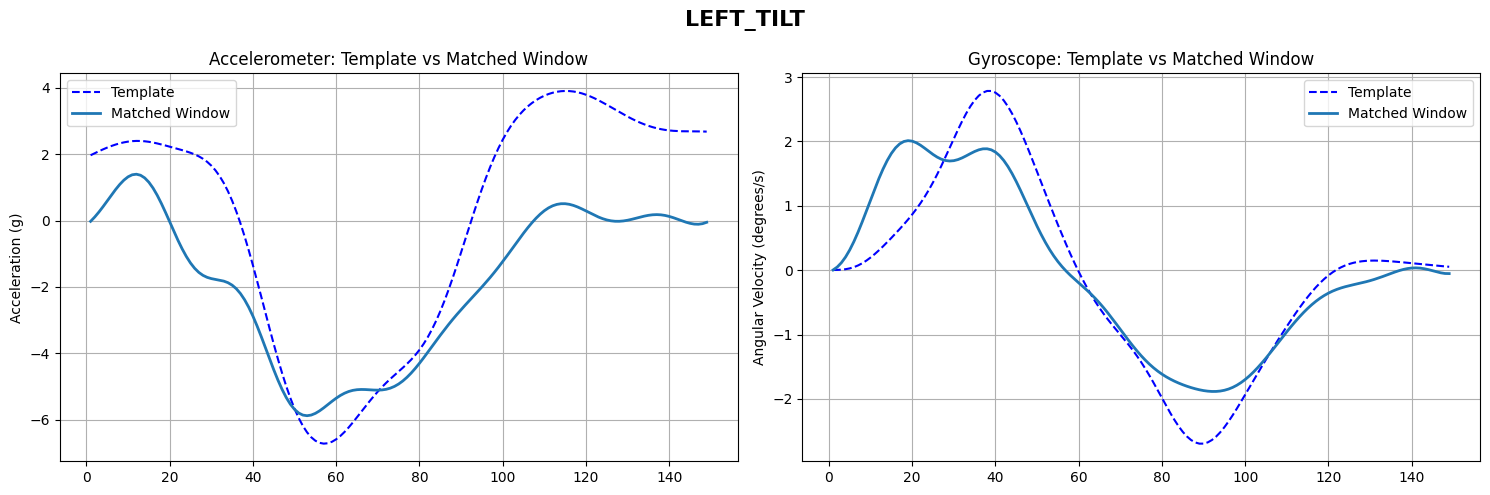

LEFT_TILT match from index 298 to 447, DTW Distance: 14.439628007800637


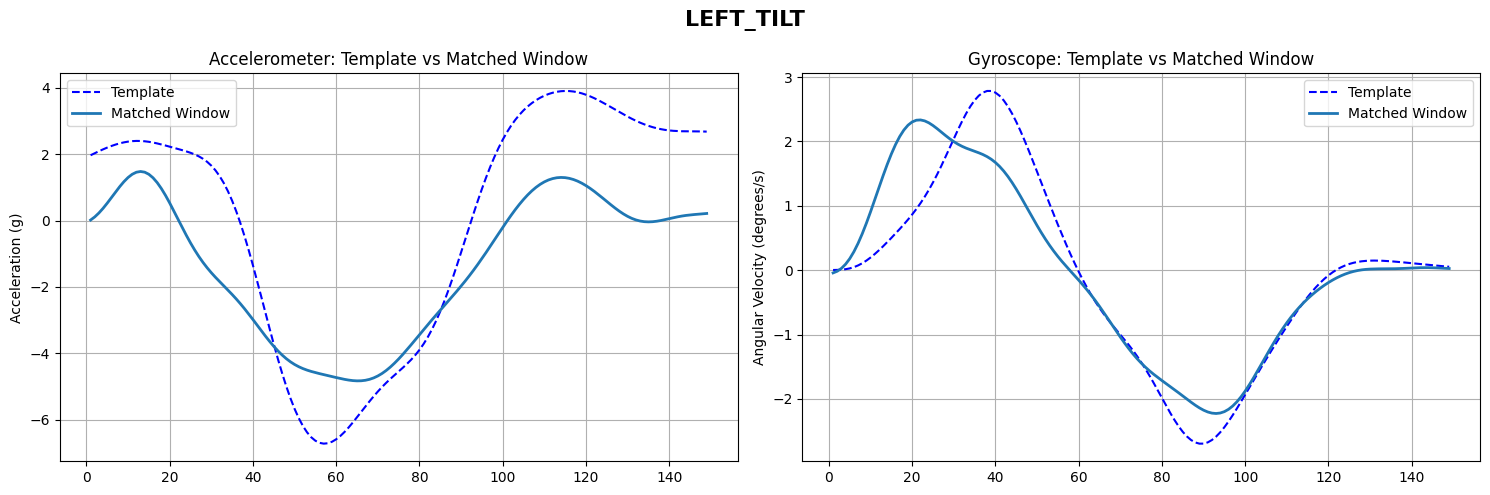

LEFT_TILT match from index 447 to 596, DTW Distance: 15.561499658297942


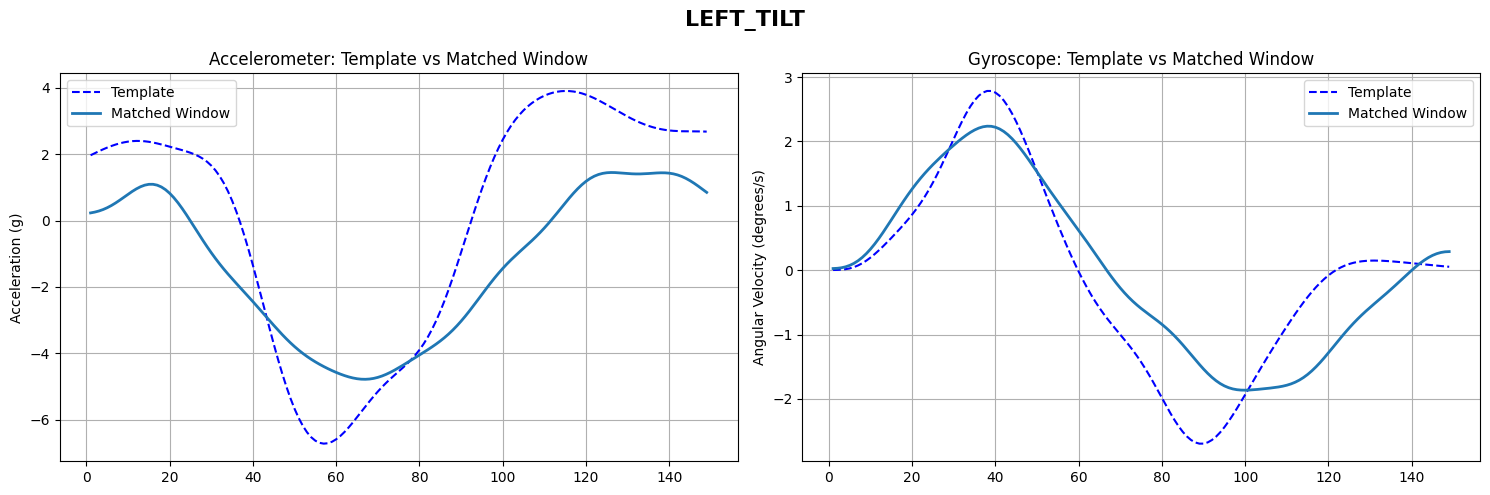

LEFT_TILT match from index 621 to 770, DTW Distance: 15.96799438421439


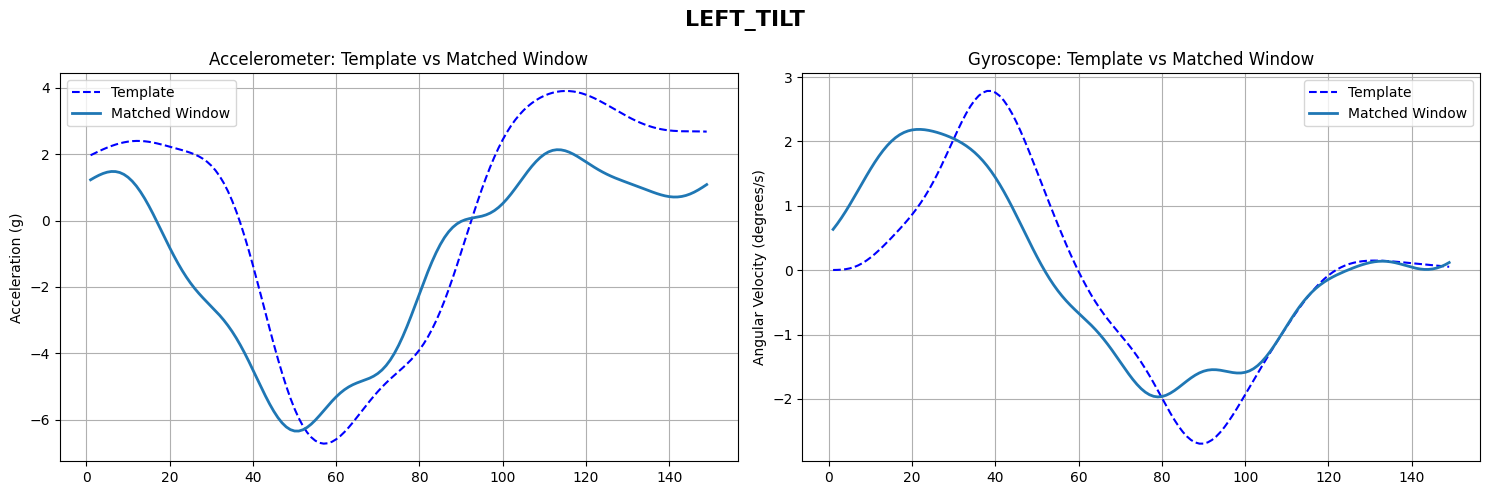

LEFT_TILT match from index 770 to 919, DTW Distance: 17.71625930845655


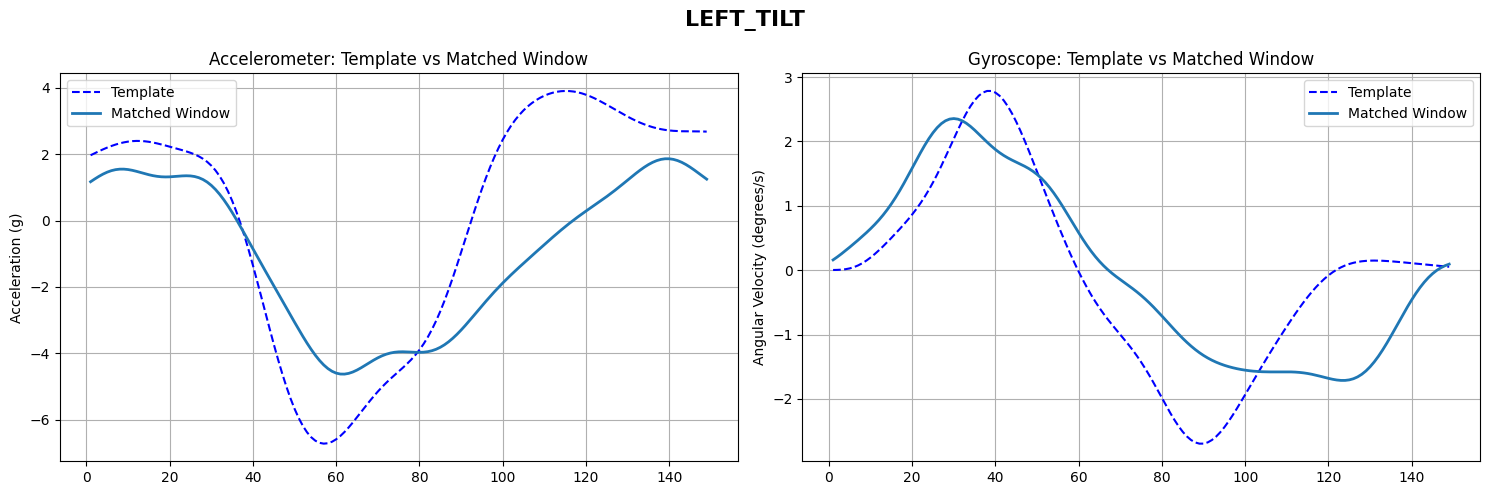

[{'start_index': 0,
  'end_index': 149,
  'dtw_distance': 20.233104340673133,
  'type': <Match.LEFT_TILT: 2>},
 {'start_index': 149,
  'end_index': 298,
  'dtw_distance': 15.814588592488388,
  'type': <Match.LEFT_TILT: 2>},
 {'start_index': 298,
  'end_index': 447,
  'dtw_distance': 14.439628007800637,
  'type': <Match.LEFT_TILT: 2>},
 {'start_index': 447,
  'end_index': 596,
  'dtw_distance': 15.561499658297942,
  'type': <Match.LEFT_TILT: 2>},
 {'start_index': 621,
  'end_index': 770,
  'dtw_distance': 15.96799438421439,
  'type': <Match.LEFT_TILT: 2>},
 {'start_index': 770,
  'end_index': 919,
  'dtw_distance': 17.71625930845655,
  'type': <Match.LEFT_TILT: 2>}]

In [37]:
# Verification on sleeping left tilts
match_tilt(df_acc_sleeping_left_tilt_filtered, df_gyro_sleeping_left_tilt_filtered, True)

# Testing

# Test 1 - Left Right Mix tilts test

Dataset collected while the person was at rest, sitting, and performed Left/Right tilts randomly

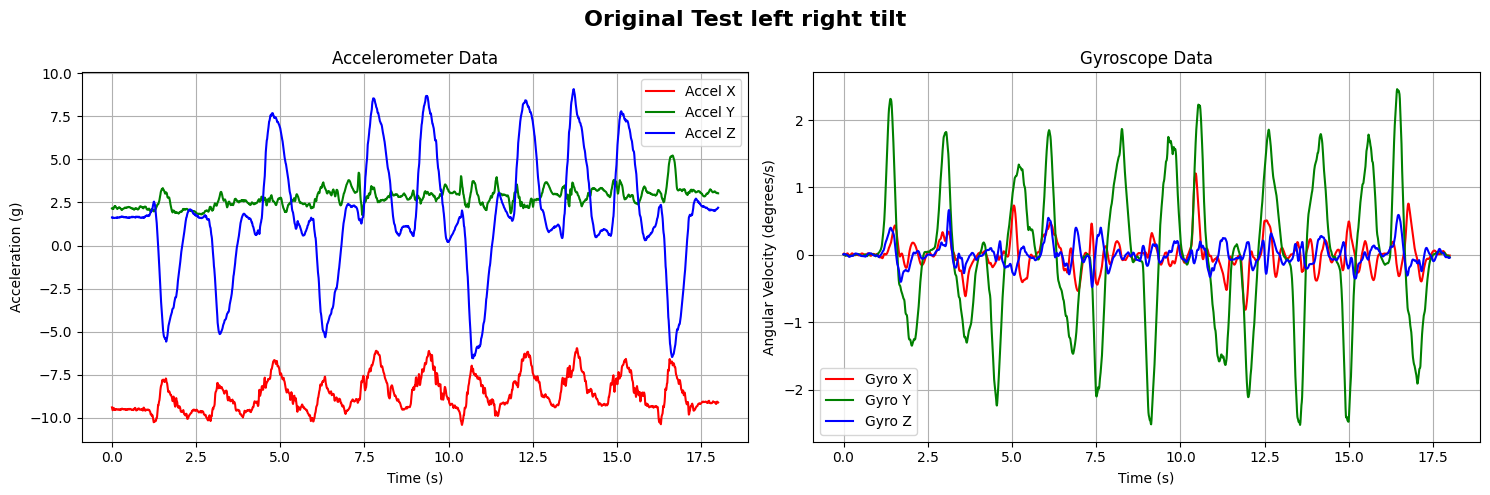

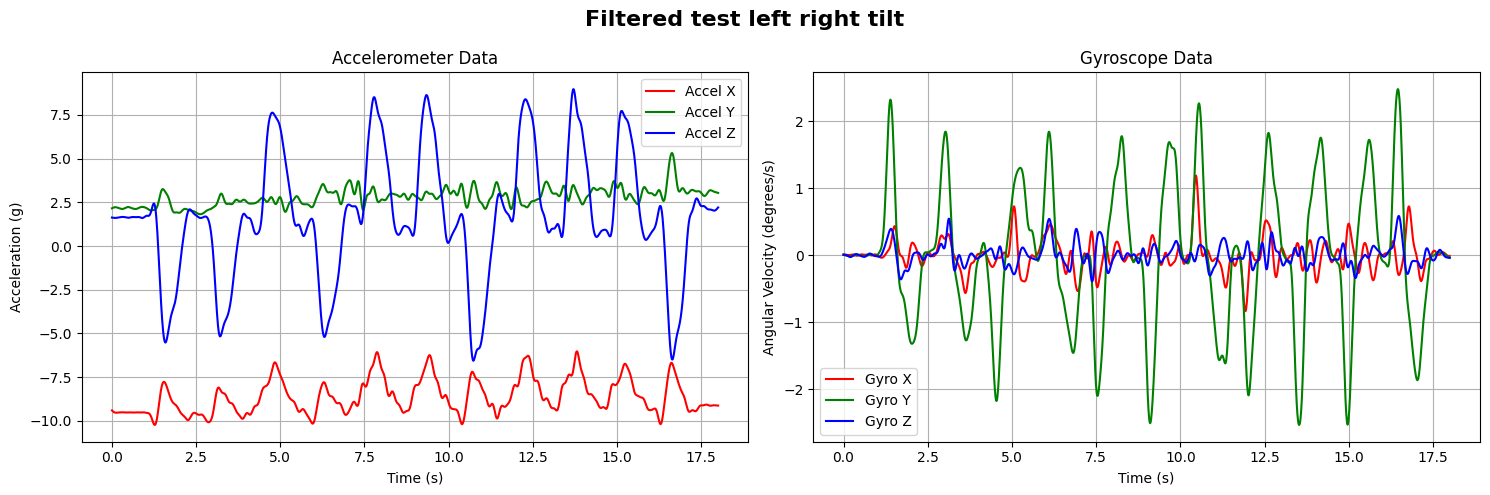

In [38]:
csv_file_acc_path_test_left_right = '/content/drive/My Drive/BreakNeck Data/Test/Left Right Tilt/Accelerometer.csv'
csv_file_gyro_path_test_left_right = '/content/drive/My Drive/BreakNeck Data/Test/Left Right Tilt/Gyroscope.csv'

df_acc_test_left_right_tilt = read_acc(csv_file_acc_path_test_left_right)
df_gyro_test_left_right_tilt = read_gyro(csv_file_gyro_path_test_left_right)

df_acc_test_left_right_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_acc_test_left_right_tilt['elapsed (s)'],
    'x-axis (g)': butter_lowpass_filter(df_acc_test_left_right_tilt['x-axis (g)']),
    'y-axis (g)': butter_lowpass_filter(df_acc_test_left_right_tilt['y-axis (g)']),
    'z-axis (g)': butter_lowpass_filter(df_acc_test_left_right_tilt['z-axis (g)'])
})

df_gyro_test_left_right_tilt_filtered = pd.DataFrame({
    'elapsed (s)': df_gyro_test_left_right_tilt['elapsed (s)'],
    'x-axis (deg/s)': butter_lowpass_filter(df_gyro_test_left_right_tilt['x-axis (deg/s)']),
    'y-axis (deg/s)': butter_lowpass_filter(df_gyro_test_left_right_tilt['y-axis (deg/s)']),
    'z-axis (deg/s)': butter_lowpass_filter(df_gyro_test_left_right_tilt['z-axis (deg/s)'])
})

plot_acc_gyro(df_acc_test_left_right_tilt, df_gyro_test_left_right_tilt, 'Original Test left right tilt')
plot_acc_gyro(df_acc_test_left_right_tilt_filtered, df_gyro_test_left_right_tilt_filtered, 'Filtered test left right tilt')

In [44]:
answer_str = 'LLRLRRLRRRL' # Recorded manually before performing the test
answer = strToMatch(answer_str)
matches = match_tilt(df_acc_test_left_right_tilt_filtered, df_gyro_test_left_right_tilt_filtered, False)

correct = 0
count = 0

for match in matches:
  if(match['type'] == answer[count]):
    print(match)
    correct += 1
  else:
    print("Misclassified match: "+match)
  count += 1

print(f"Accuracy: {((correct/count)*100)}%")

{'start_index': 100, 'end_index': 249, 'dtw_distance': 13.840561340507513, 'type': <Match.LEFT_TILT: 2>}
{'start_index': 274, 'end_index': 423, 'dtw_distance': 14.026787245583858, 'type': <Match.LEFT_TILT: 2>}
{'start_index': 398, 'end_index': 547, 'dtw_distance': 7.923352110669804, 'type': <Match.RIGHT_TILT: 1>}
{'start_index': 572, 'end_index': 721, 'dtw_distance': 14.913573338505927, 'type': <Match.LEFT_TILT: 2>}
{'start_index': 696, 'end_index': 845, 'dtw_distance': 9.664284163598863, 'type': <Match.RIGHT_TILT: 1>}
{'start_index': 845, 'end_index': 994, 'dtw_distance': 14.240792246840122, 'type': <Match.RIGHT_TILT: 1>}
{'start_index': 1019, 'end_index': 1168, 'dtw_distance': 14.466474114846463, 'type': <Match.LEFT_TILT: 2>}
{'start_index': 1143, 'end_index': 1292, 'dtw_distance': 9.284105539305543, 'type': <Match.RIGHT_TILT: 1>}
{'start_index': 1292, 'end_index': 1441, 'dtw_distance': 8.406836436316716, 'type': <Match.RIGHT_TILT: 1>}
{'start_index': 1441, 'end_index': 1590, 'dtw_di

## Test 2 - Walk Test

Dataset collected while the person was in motion, while walking, with multiple turnings

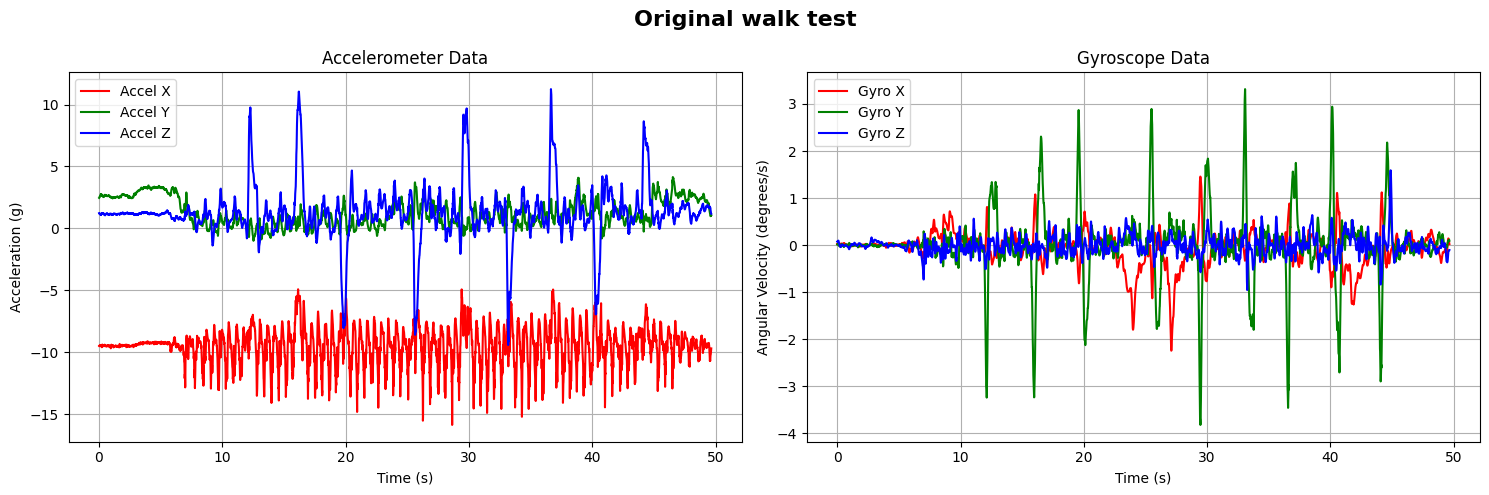

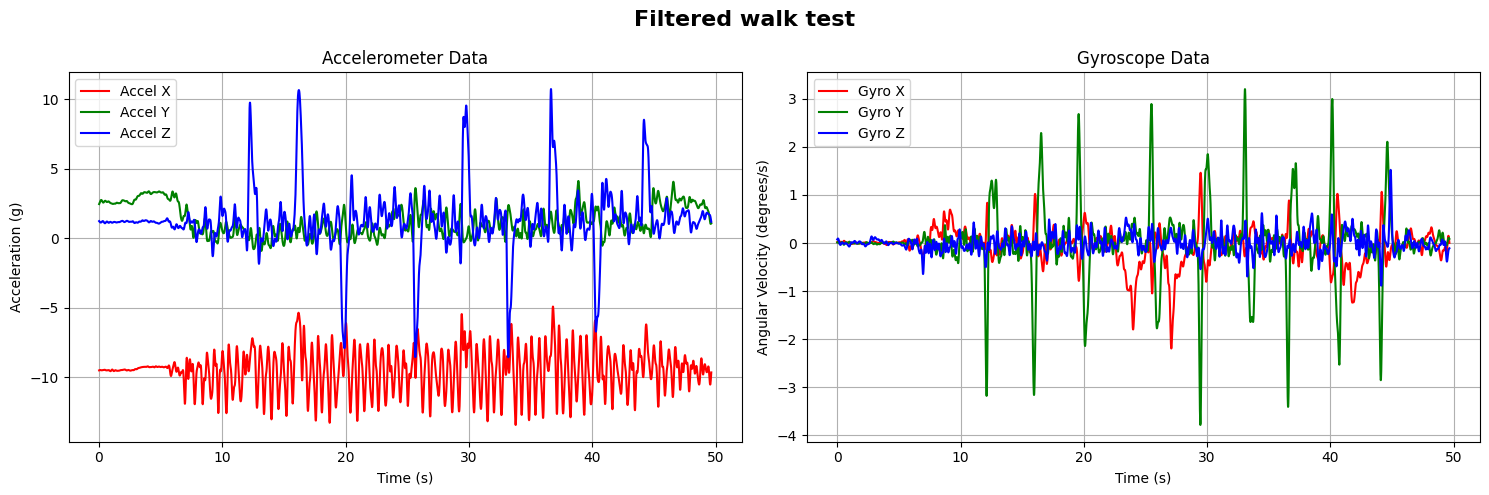

In [40]:
csv_file_acc_path_test_walk = '/content/drive/My Drive/BreakNeck Data/Test/Walk Test/Accelerometer.csv'
csv_file_gyro_path_test_walk = '/content/drive/My Drive/BreakNeck Data/Test/Walk Test/Gyroscope.csv'

df_acc_test_walk = read_acc(csv_file_acc_path_test_walk)
df_gyro_test_walk = read_gyro(csv_file_gyro_path_test_walk)

df_acc_test_walk_filtered = pd.DataFrame({
    'elapsed (s)': df_acc_test_walk['elapsed (s)'],
    'x-axis (g)': butter_lowpass_filter(df_acc_test_walk['x-axis (g)']),
    'y-axis (g)': butter_lowpass_filter(df_acc_test_walk['y-axis (g)']),
    'z-axis (g)': butter_lowpass_filter(df_acc_test_walk['z-axis (g)'])
})

df_gyro_test_walk_filtered = pd.DataFrame({
    'elapsed (s)': df_gyro_test_walk['elapsed (s)'],
    'x-axis (deg/s)': butter_lowpass_filter(df_gyro_test_walk['x-axis (deg/s)']),
    'y-axis (deg/s)': butter_lowpass_filter(df_gyro_test_walk['y-axis (deg/s)']),
    'z-axis (deg/s)': butter_lowpass_filter(df_gyro_test_walk['z-axis (deg/s)'])
})

plot_acc_gyro(df_acc_test_walk, df_gyro_test_walk, 'Original walk test')
plot_acc_gyro(df_acc_test_walk_filtered, df_gyro_test_walk_filtered, 'Filtered walk test')

In [41]:
answer_str = 'RRLLRLRLR' # Recorded manually before performing the test
answer = strToMatch(answer_str)
matches = match_tilt(df_acc_test_walk_filtered, df_gyro_test_walk_filtered, False)

correct = 0
count = 0

for match in matches:
  if(match['type'] == answer[count]):
    print(match)
    correct += 1
  else:
    print(f"Misclassified match: {answer[count]} misclassified as {match}")
  count += 1

print(f"Accuracy: {((correct/count)*100)}%")

{'start_index': 1125, 'end_index': 1274, 'dtw_distance': 18.084828247463133, 'type': <Match.RIGHT_TILT: 1>}
{'start_index': 1524, 'end_index': 1673, 'dtw_distance': 13.374693837490245, 'type': <Match.RIGHT_TILT: 1>}
{'start_index': 1898, 'end_index': 2047, 'dtw_distance': 9.860762671519085, 'type': <Match.LEFT_TILT: 2>}
{'start_index': 2472, 'end_index': 2621, 'dtw_distance': 10.5617010662309, 'type': <Match.LEFT_TILT: 2>}
{'start_index': 2846, 'end_index': 2995, 'dtw_distance': 13.538133245609028, 'type': <Match.RIGHT_TILT: 1>}
{'start_index': 3220, 'end_index': 3369, 'dtw_distance': 11.201916996504938, 'type': <Match.LEFT_TILT: 2>}
{'start_index': 3544, 'end_index': 3693, 'dtw_distance': 11.667791226115678, 'type': <Match.RIGHT_TILT: 1>}
{'start_index': 3918, 'end_index': 4067, 'dtw_distance': 6.688959477429849, 'type': <Match.LEFT_TILT: 2>}
{'start_index': 4292, 'end_index': 4441, 'dtw_distance': 10.833904673434672, 'type': <Match.RIGHT_TILT: 1>}
Accuracy: 100.0%


## Test 3 - Cycling Test

Dataset collected while the person was cycling, with multiple turnings

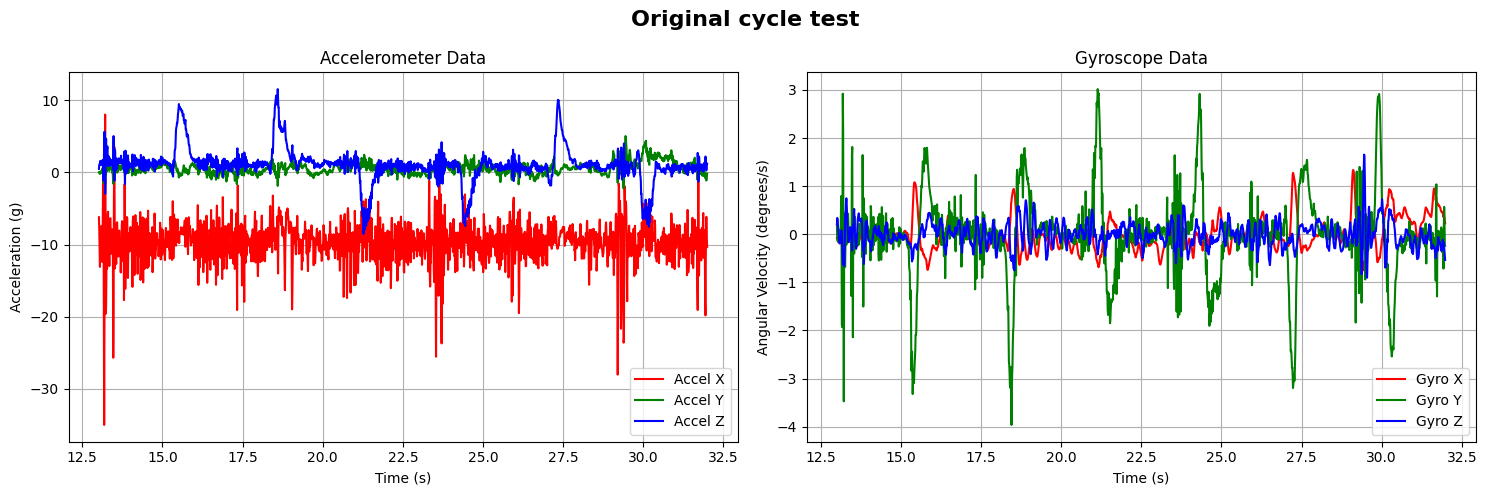

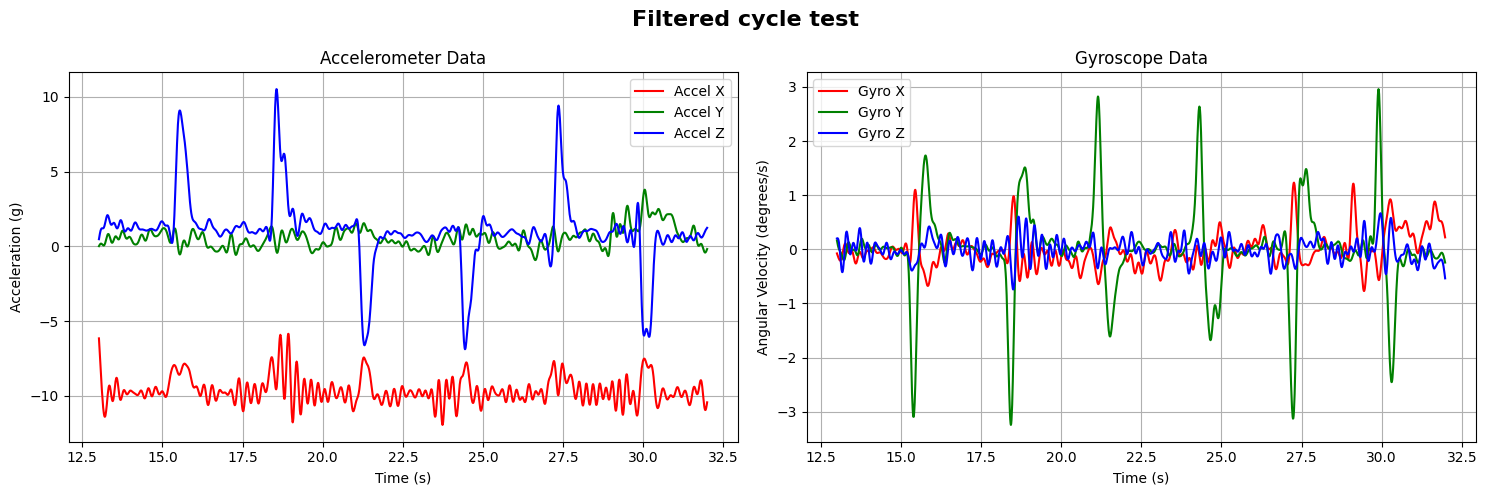

In [42]:
csv_file_acc_path_test_cycle = '/content/drive/My Drive/BreakNeck Data/Test/Cycle Test/Accelerometer.csv'
csv_file_gyro_path_test_cycle = '/content/drive/My Drive/BreakNeck Data/Test/Cycle Test/Gyroscope.csv'

df_acc_test_cycle = read_acc(csv_file_acc_path_test_cycle)
df_gyro_test_cycle = read_gyro(csv_file_gyro_path_test_cycle)

df_acc_test_cycle_filtered = pd.DataFrame({
    'elapsed (s)': df_acc_test_cycle['elapsed (s)'],
    'x-axis (g)': butter_lowpass_filter(df_acc_test_cycle['x-axis (g)']),
    'y-axis (g)': butter_lowpass_filter(df_acc_test_cycle['y-axis (g)']),
    'z-axis (g)': butter_lowpass_filter(df_acc_test_cycle['z-axis (g)'])
})

df_gyro_test_cycle_filtered = pd.DataFrame({
    'elapsed (s)': df_gyro_test_cycle['elapsed (s)'],
    'x-axis (deg/s)': butter_lowpass_filter(df_gyro_test_cycle['x-axis (deg/s)']),
    'y-axis (deg/s)': butter_lowpass_filter(df_gyro_test_cycle['y-axis (deg/s)']),
    'z-axis (deg/s)': butter_lowpass_filter(df_gyro_test_cycle['z-axis (deg/s)'])
})

plot_acc_gyro(df_acc_test_cycle, df_gyro_test_cycle, 'Original cycle test')
plot_acc_gyro(df_acc_test_cycle_filtered, df_gyro_test_cycle_filtered, 'Filtered cycle test')

In [43]:
answer_str = 'RRLLRLLRLRRR' # Recorded manually before performing the test
answer = strToMatch(answer_str)
matches = match_tilt(df_acc_test_cycle_filtered, df_gyro_test_cycle_filtered, False)

correct = 0
count = 0

for match in matches:
  if (count >= len(answer)):
    break
  if(match['type'] == answer[count]):
    print(match)
    correct += 1
  else:
    print(f"Misclassified match: {answer[count]} misclassified as {match}")
  count += 1

print(f"Accuracy: {((correct/count)*100)}%")

{'start_index': 175, 'end_index': 324, 'dtw_distance': 13.771878674181515, 'type': <Match.RIGHT_TILT: 1>}
{'start_index': 474, 'end_index': 623, 'dtw_distance': 13.139838609312974, 'type': <Match.RIGHT_TILT: 1>}
{'start_index': 773, 'end_index': 922, 'dtw_distance': 19.174164728279944, 'type': <Match.LEFT_TILT: 2>}
{'start_index': 1072, 'end_index': 1221, 'dtw_distance': 11.755872317794182, 'type': <Match.LEFT_TILT: 2>}
{'start_index': 1346, 'end_index': 1495, 'dtw_distance': 18.864984092876455, 'type': <Match.RIGHT_TILT: 1>}
{'start_index': 1620, 'end_index': 1769, 'dtw_distance': 16.528958372160595, 'type': <Match.LEFT_TILT: 2>}
Accuracy: 100.0%
